### This Dataset was generated as of October, 2016.

In [2]:
import os, re

In [4]:
# Importing relevant libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import chi2_contingency
from datetime import datetime, date

from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE

In [6]:
# os: allows python code to interact with the underlying operating system in a variety of ways.
# Numpy and Pandas: for Data Analysis and Manipulation.
# Matplotlib and Seaborn: for Data Visualisation.

In [8]:
# Set working directory to the path where the data exists
os.chdir('C:\\Users\\Susan Ololade\\Documents\\GRADUATE PROGRAM_SHU\\SHEFFIELD HALLAM UNIVERSITY\\22082024_DPM')

### Data Preprocessing
Data Preparation is the process of transforming the data so that it may be easily processed by the machine.

### Understanding the Dormancy Records Dataset

In [12]:
# Loading the dormancy records dataset
df = pd.read_csv("dpm_records_dataset.csv")
df

,MSISDN,NRGE,YON,BALANCE_AMT,PACKAGE_KEY,TENURE_MONTHS_CNT,TENURE_DAYS_CNT,CUSTOMER_SEGMENT_KEY,LAST_RECHARGE_DT_CNT,MIGRATION_CNT,...,SERVICE_CLASS,GEOREGION,NGSTATE,TERRITORY,DATA_USAGE,SMS_USAGE,VAS_USAGE,VOICE_USAGE,SERVICE_CNT,DORMANCY_STATE
0,2349036855531,0,2,0.050000,790,31,939,37,3,0,...,BETATALK,NORTH WEST,KADUNA,KADUNA NORTH,Data User,SMS User,Non VAS,Voice User,04_Three Services,Active
1,2348034268115,0,2,0.042333,2,29,868,54,1,0,...,TRUTALK,NORTH WEST,KANO,KANO CENTRAL,Data User,SMS User,Non VAS,Voice User,04_Three Services,Active
2,2349037271407,1,1,0.300000,790,20,598,85,3,0,...,BETATALK,SOUTH WEST,OGUN,IJEBU-ODE,Non Data,SMS User,Non VAS,Voice User,03_Two Services,Active
3,2348068566006,2,10,0.050000,790,122,3718,64,4,0,...,BETATALK,SOUTH WEST,LAGOS,LAGOS MAINLAND,Non Data,SMS User,Non VAS,Voice User,03_Two Services,Active
4,2347062480346,2,5,18.430200,790,64,1935,1,23,0,...,BETATALK,NORTH EAST,BAUCHI,KATAGUM,Data User,SMS User,Non VAS,Voice User,04_Three Services,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2347067109692,0,3,30.750000,44,39,1172,50,4,0,...,ZONE,SOUTH EAST,IMO,OWERRI 1,Non Data,SMS User,Non VAS,Voice User,03_Two Services,Active
99996,2348108269531,0,1,-549.820000,790,18,548,60,1,0,...,BETATALK,SOUTH SOUTH,DELTA,WARRI,Non Data,SMS User,Non VAS,Voice User,03_Two Services,Active
99997,2347030178915,0,3,5.610000,790,47,1429,35,5,0,...,BETATALK,NORTH CENTRAL,NASSARAWA,KEFFI,Data User,SMS User,Non VAS,Voice User,04_Three Services,Active
99998,2348142723677,0,3,0.081332,2,38,1152,1,0,0,...,TRUTALK,NORTH WEST,KATSINA,KATSINA,Data User,SMS User,Non VAS,Voice User,04_Three Services,Active


In [14]:
# Displays the first five rows of the dataset
df.head()

,MSISDN,NRGE,YON,BALANCE_AMT,PACKAGE_KEY,TENURE_MONTHS_CNT,TENURE_DAYS_CNT,CUSTOMER_SEGMENT_KEY,LAST_RECHARGE_DT_CNT,MIGRATION_CNT,...,SERVICE_CLASS,GEOREGION,NGSTATE,TERRITORY,DATA_USAGE,SMS_USAGE,VAS_USAGE,VOICE_USAGE,SERVICE_CNT,DORMANCY_STATE
0,2349036855531,0,2,0.050000,790,31,939,37,3,0,...,BETATALK,NORTH WEST,KADUNA,KADUNA NORTH,Data User,SMS User,Non VAS,Voice User,04_Three Services,Active
1,2348034268115,0,2,0.042333,2,29,868,54,1,0,...,TRUTALK,NORTH WEST,KANO,KANO CENTRAL,Data User,SMS User,Non VAS,Voice User,04_Three Services,Active
2,2349037271407,1,1,0.300000,790,20,598,85,3,0,...,BETATALK,SOUTH WEST,OGUN,IJEBU-ODE,Non Data,SMS User,Non VAS,Voice User,03_Two Services,Active
3,2348068566006,2,10,0.050000,790,122,3718,64,4,0,...,BETATALK,SOUTH WEST,LAGOS,LAGOS MAINLAND,Non Data,SMS User,Non VAS,Voice User,03_Two Services,Active
4,2347062480346,2,5,18.430200,790,64,1935,1,23,0,...,BETATALK,NORTH EAST,BAUCHI,KATAGUM,Data User,SMS User,Non VAS,Voice User,04_Three Services,Active


In [18]:
# Displays the last five rows of the dataset
df.tail()

,MSISDN,NRGE,YON,BALANCE_AMT,PACKAGE_KEY,TENURE_MONTHS_CNT,TENURE_DAYS_CNT,CUSTOMER_SEGMENT_KEY,LAST_RECHARGE_DT_CNT,MIGRATION_CNT,...,SERVICE_CLASS,GEOREGION,NGSTATE,TERRITORY,DATA_USAGE,SMS_USAGE,VAS_USAGE,VOICE_USAGE,SERVICE_CNT,DORMANCY_STATE
99995,2347067109692,0,3,30.750000,44,39,1172,50,4,0,...,ZONE,SOUTH EAST,IMO,OWERRI 1,Non Data,SMS User,Non VAS,Voice User,03_Two Services,Active
99996,2348108269531,0,1,-549.820000,790,18,548,60,1,0,...,BETATALK,SOUTH SOUTH,DELTA,WARRI,Non Data,SMS User,Non VAS,Voice User,03_Two Services,Active
99997,2347030178915,0,3,5.610000,790,47,1429,35,5,0,...,BETATALK,NORTH CENTRAL,NASSARAWA,KEFFI,Data User,SMS User,Non VAS,Voice User,04_Three Services,Active
99998,2348142723677,0,3,0.081332,2,38,1152,1,0,0,...,TRUTALK,NORTH WEST,KATSINA,KATSINA,Data User,SMS User,Non VAS,Voice User,04_Three Services,Active
99999,2347062343937,7,3,0.103333,790,46,1399,38,17075,0,...,BETATALK,NORTH CENTRAL,BENUE,GBOKO,Non Data,SMS User,Non VAS,Non-Voice,02_One Service,Active


### Exploratory Data Analysis (EDA)

In [21]:
# Displays columns of the data features
df.columns

Index(['MSISDN', 'NRGE', 'YON', 'BALANCE_AMT', 'PACKAGE_KEY',
       'TENURE_MONTHS_CNT', 'TENURE_DAYS_CNT', 'CUSTOMER_SEGMENT_KEY',
       'LAST_RECHARGE_DT_CNT', 'MIGRATION_CNT', 'TOTAL_NO_CC_CONTACT',
       'LAST_TX_TYPE', 'ACTIVE_CNT_RECHARGE', 'ACTIVE_CNT_DATA_SPEND',
       'ACTIVE_CNT_DATA_VOL', 'ACTIVE_CNT_RECHARGE_COUNT',
       'ACTIVE_CNT_DATA_SESSION', 'ACTIVE_CNT_CALL_DURATION',
       'ACTIVE_CNT_CALL_SESSION', 'DEVICE_TYPE', 'TENUREX', 'SMS_CNT',
       'VAS_CNT', 'DATA_CNT', 'CALL_CNT', 'SERVICE_CLASS', 'GEOREGION',
       'NGSTATE', 'TERRITORY', 'DATA_USAGE', 'SMS_USAGE', 'VAS_USAGE',
       'VOICE_USAGE', 'SERVICE_CNT', 'DORMANCY_STATE'],
      dtype='object')

In [23]:
# Returns the information of the dormancy records dataset i.e data type, non-null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   MSISDN                     100000 non-null  int64  
 1   NRGE                       100000 non-null  int64  
 2   YON                        100000 non-null  int64  
 3   BALANCE_AMT                100000 non-null  float64
 4   PACKAGE_KEY                100000 non-null  int64  
 5   TENURE_MONTHS_CNT          100000 non-null  int64  
 6   TENURE_DAYS_CNT            100000 non-null  int64  
 7   CUSTOMER_SEGMENT_KEY       100000 non-null  int64  
 8   LAST_RECHARGE_DT_CNT       100000 non-null  int64  
 9   MIGRATION_CNT              100000 non-null  int64  
 10  TOTAL_NO_CC_CONTACT        100000 non-null  int64  
 11  LAST_TX_TYPE               100000 non-null  object 
 12  ACTIVE_CNT_RECHARGE        100000 non-null  int64  
 13  ACTIVE_CNT_DATA_SPEND      100

In [25]:
# Function to add data label to chart
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], '{:.1f}'.format(y[i]), ha = 'center',
                 bbox = dict(facecolor = 'white', alpha =.8))

### Checking for Null values using bar plot

C:\Users\Susan Ololade\AppData\Local\Temp\ipykernel_13924\640429172.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], '{:.1f}'.format(y[i]), ha = 'center',


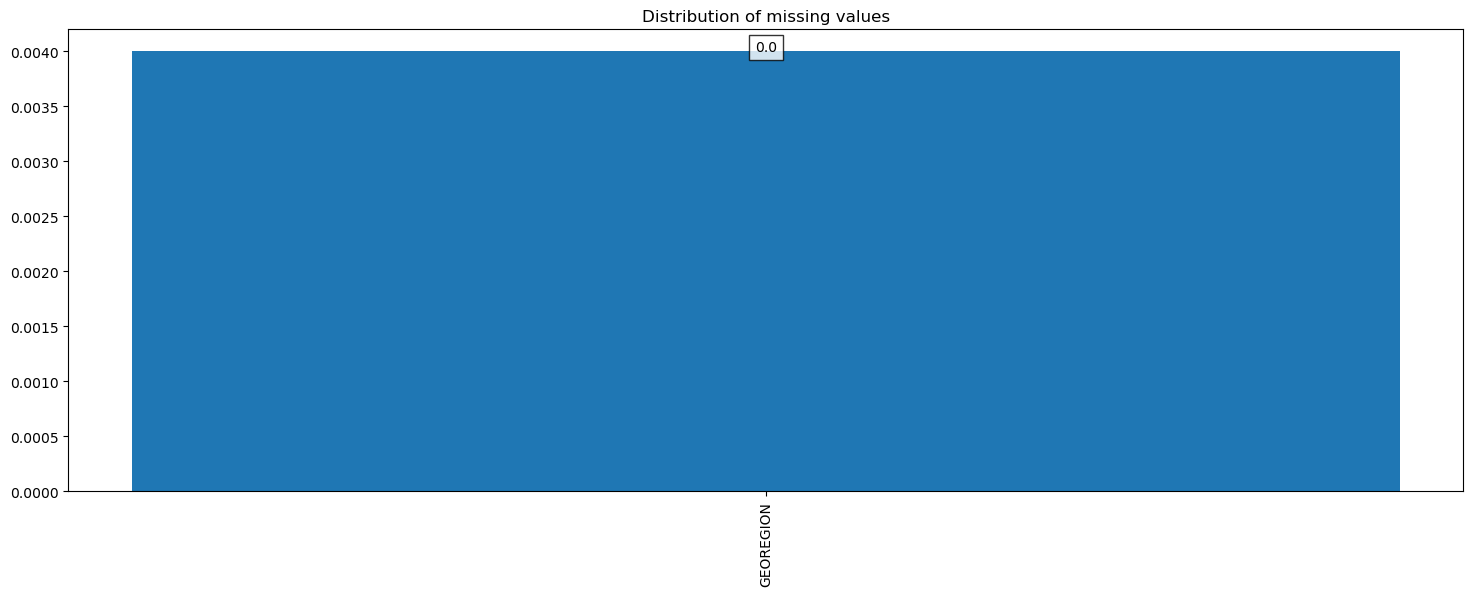

In [28]:
# Set the figure size for the plot
plt.figure(figsize=(18,6))

# Calculates the percentage of missing values for each column
na_val = (df.isnull().sum() / len(df)) * 100

# Drop columns that have no missing values
na_val = na_val.drop(na_val[na_val == 0].index).sort_values(ascending=False)

# Creates a dataframe with missing values percentage for easier manipulation
na_cols_df = pd.DataFrame({'Missing values (in %)' :na_val})

# Plot a bar chart showing the missing values percentage for each columns with missing values
plt.bar(data=na_cols_df, x=na_cols_df.index, height='Missing values (in %)')

# Adding labels to each bar
addlabels(na_cols_df.index, na_cols_df['Missing values (in %)'])

# Set the title of the plot
plt.title('Distribution of missing values')

# Rotate the x-axis lables for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

From the bar plot above, it shows that there are no null values. 

In [31]:
# Displays the shape of the dataset (i.e Dimensionality of the dataset)
df.shape

(100000, 35)

In [33]:
# Checking for null values
df.isnull().sum()

MSISDN                       0
NRGE                         0
YON                          0
BALANCE_AMT                  0
PACKAGE_KEY                  0
TENURE_MONTHS_CNT            0
TENURE_DAYS_CNT              0
CUSTOMER_SEGMENT_KEY         0
LAST_RECHARGE_DT_CNT         0
MIGRATION_CNT                0
TOTAL_NO_CC_CONTACT          0
LAST_TX_TYPE                 0
ACTIVE_CNT_RECHARGE          0
ACTIVE_CNT_DATA_SPEND        0
ACTIVE_CNT_DATA_VOL          0
ACTIVE_CNT_RECHARGE_COUNT    0
ACTIVE_CNT_DATA_SESSION      0
ACTIVE_CNT_CALL_DURATION     0
ACTIVE_CNT_CALL_SESSION      0
DEVICE_TYPE                  0
TENUREX                      0
SMS_CNT                      0
VAS_CNT                      0
DATA_CNT                     0
CALL_CNT                     0
SERVICE_CLASS                0
GEOREGION                    4
NGSTATE                      0
TERRITORY                    0
DATA_USAGE                   0
SMS_USAGE                    0
VAS_USAGE                    0
VOICE_US

In [35]:
# Iterating through each columns, checking their data type, number of nulls, unique values and then prints the summary for each columns.
cols = df.columns
for col in cols:
    if col == 'MSISDN' or df[col].dtype == 'object':
        print(f"Column '{col}' is of type {df[col].dtype}, {df[col].isna().sum()} null values, {df[col].nunique()} unique values")
    else:
        print(f"Column '{col}' is of type {df[col].dtype}, {df[col].isna().sum()} null values")

Column 'MSISDN' is of type int64, 0 null values, 99987 unique values
Column 'NRGE' is of type int64, 0 null values
Column 'YON' is of type int64, 0 null values
Column 'BALANCE_AMT' is of type float64, 0 null values
Column 'PACKAGE_KEY' is of type int64, 0 null values
Column 'TENURE_MONTHS_CNT' is of type int64, 0 null values
Column 'TENURE_DAYS_CNT' is of type int64, 0 null values
Column 'CUSTOMER_SEGMENT_KEY' is of type int64, 0 null values
Column 'LAST_RECHARGE_DT_CNT' is of type int64, 0 null values
Column 'MIGRATION_CNT' is of type int64, 0 null values
Column 'TOTAL_NO_CC_CONTACT' is of type int64, 0 null values
Column 'LAST_TX_TYPE' is of type object, 0 null values, 6 unique values
Column 'ACTIVE_CNT_RECHARGE' is of type int64, 0 null values
Column 'ACTIVE_CNT_DATA_SPEND' is of type int64, 0 null values
Column 'ACTIVE_CNT_DATA_VOL' is of type int64, 0 null values
Column 'ACTIVE_CNT_RECHARGE_COUNT' is of type int64, 0 null values
Column 'ACTIVE_CNT_DATA_SESSION' is of type int64, 0

#### Checking duplicates for MSISDN

In [38]:
df.groupby(['MSISDN'])['MSISDN'].agg(cnt = 'count').sort_values(by = 'cnt', ascending = False).reset_index().query('cnt>1')

,MSISDN,cnt
0,2348103523627,2
1,2348105984459,2
2,2348064898680,2
3,2348168323762,2
4,2347037866423,2
5,2348141154475,2
6,2348133661427,2
7,2347033867048,2
8,2347065842006,2
9,2348034960536,2


In [40]:
dup_msisdn = df.groupby(['MSISDN'])['MSISDN'].agg(cnt = 'count').sort_values(by = 'cnt', ascending = False).reset_index().query('cnt>1')
df.query(f'MSISDN in {list(dup_msisdn.MSISDN)}').sort_values(by = 'MSISDN')

,MSISDN,NRGE,YON,BALANCE_AMT,PACKAGE_KEY,TENURE_MONTHS_CNT,TENURE_DAYS_CNT,CUSTOMER_SEGMENT_KEY,LAST_RECHARGE_DT_CNT,MIGRATION_CNT,...,SERVICE_CLASS,GEOREGION,NGSTATE,TERRITORY,DATA_USAGE,SMS_USAGE,VAS_USAGE,VOICE_USAGE,SERVICE_CNT,DORMANCY_STATE
8956,2347033867048,33,3,0.000000,790,47,1421,35,75,0,...,BETATALK,NORTH CENTRAL,BENUE,MAKURDI,Data User,SMS User,Non VAS,Voice User,04_Three Services,Dormant
62959,2347033867048,33,3,0.000000,790,47,1421,35,75,0,...,BETATALK,NORTH CENTRAL,BENUE,MAKURDI,Data User,SMS User,Non VAS,Voice User,04_Three Services,Dormant
25598,2347037866423,0,6,6.117500,790,78,2366,73,1,0,...,BETATALK,SOUTH WEST,EKITI,ADO EKITI,Non Data,SMS User,Non VAS,Voice User,03_Two Services,Active
55894,2347037866423,0,6,6.117500,790,78,2366,73,1,0,...,BETATALK,SOUTH WEST,EKITI,ADO EKITI,Non Data,SMS User,Non VAS,Voice User,03_Two Services,Active
3763,2347038800873,0,2,0.290000,790,25,757,23,0,0,...,BETATALK,NORTH WEST,JIGAWA,DUTSE,Data User,SMS User,Non VAS,Voice User,04_Three Services,Active
45567,2347038800873,0,2,0.290000,790,25,757,23,0,0,...,BETATALK,NORTH WEST,JIGAWA,DUTSE,Data User,SMS User,Non VAS,Voice User,04_Three Services,Active
77532,2347065842006,0,3,-49.894000,44,38,1158,91,5,0,...,ZONE,SOUTH WEST,OSUN,OSOGBO,Non Data,SMS User,Non VAS,Voice User,03_Two Services,Active
77139,2347065842006,0,3,-49.894000,44,38,1158,91,5,0,...,ZONE,SOUTH WEST,OSUN,OSOGBO,Non Data,SMS User,Non VAS,Voice User,03_Two Services,Active
65642,2347067175071,2,1,-100.000000,20816,20,598,14,5,0,...,PULSE,SOUTH WEST,OGUN,ABEOKUTA,Data User,SMS User,Non VAS,Voice User,04_Three Services,Active
99355,2347067175071,2,1,-100.000000,20816,20,598,14,5,0,...,PULSE,SOUTH WEST,OGUN,ABEOKUTA,Data User,SMS User,Non VAS,Voice User,04_Three Services,Active


From the output above, it is observed that the records for MSISDN is duplicated. Hence, duplicated MSISDN values will be dropped. 

### Drop MSISDN duplicates

In [44]:
# Drop duplicates based on MSISDN key
df = df.drop_duplicates(subset=['MSISDN'], keep='last')

### Dropping Irrelevant variable

Dropping irrelevant variable for attribute VAS_USAGE because it has  unary value. That is, it has only one unique value and the variable will not be relevant in building the models.

In [47]:
df = df.drop(['VAS_USAGE'], axis=1)

In [49]:
df.shape

(99987, 34)

C:\Users\Susan Ololade\AppData\Local\Temp\ipykernel_13924\2595129476.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = dormancy_percentages[index]


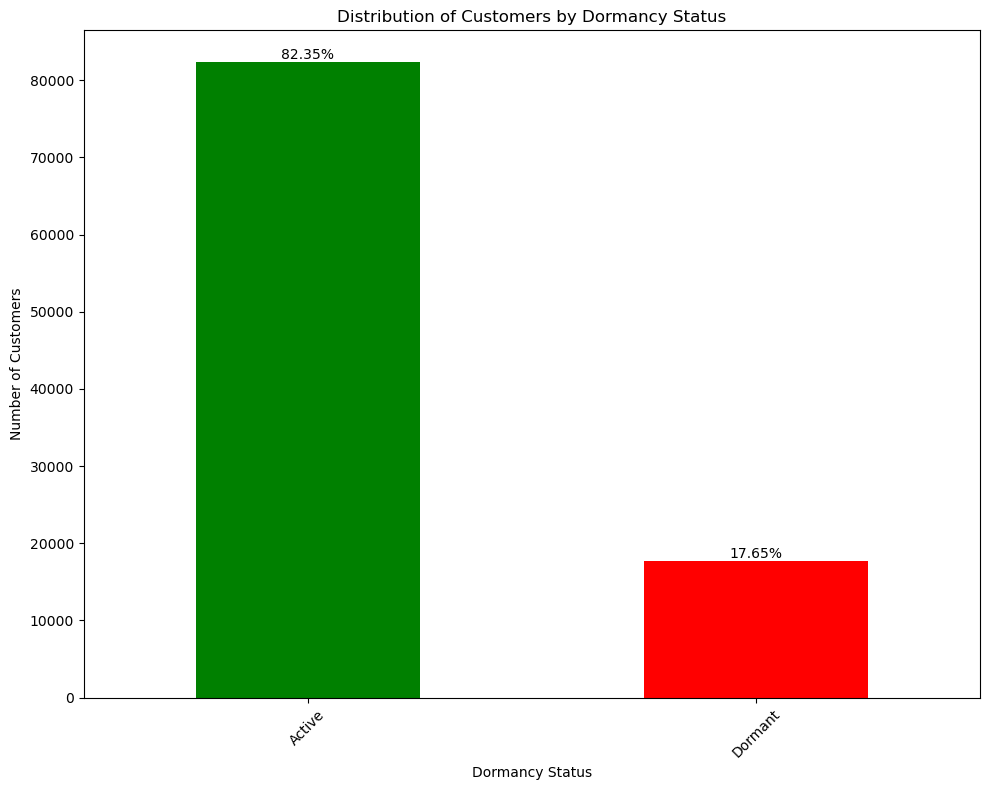

In [51]:
# Visualising the distribution and percentage of customers based on their dormancy status.

# Count the number of customers in each dormancy status
dormancy_counts = df.groupby(['DORMANCY_STATE'])['DORMANCY_STATE'].agg('count')

# Calculate the percentage of each dormancy status
dormancy_percentages = dormancy_counts / dormancy_counts.sum() * 100

# Sort by count in descending order
dormancy_counts = dormancy_counts.sort_values(ascending=False)
dormancy_percentages = dormancy_percentages.sort_values(ascending=False)

# Limit to top 20 dormancy status (if needed)
##top_n = 20
#dormancy_counts = dormancy_counts.head(top_n)
#dormancy_percentages = dormancy_percentages.head(top_n)

# Create a vertical bar plot with a larger figure size
plt.figure(figsize=(10, 8))
ax = dormancy_counts.plot(kind='bar', color=['green', 'red'])

# Add annotations for the percentage
for index, value in enumerate(dormancy_counts):
    percentage = dormancy_percentages[index]
    ax.text(index, value, f'{percentage:.2f}%', ha='center', va='bottom')

# Set title and labels
plt.title('Distribution of Customers by Dormancy Status')
plt.xlabel('Dormancy Status')
plt.ylabel('Number of Customers')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show plot
plt.show()

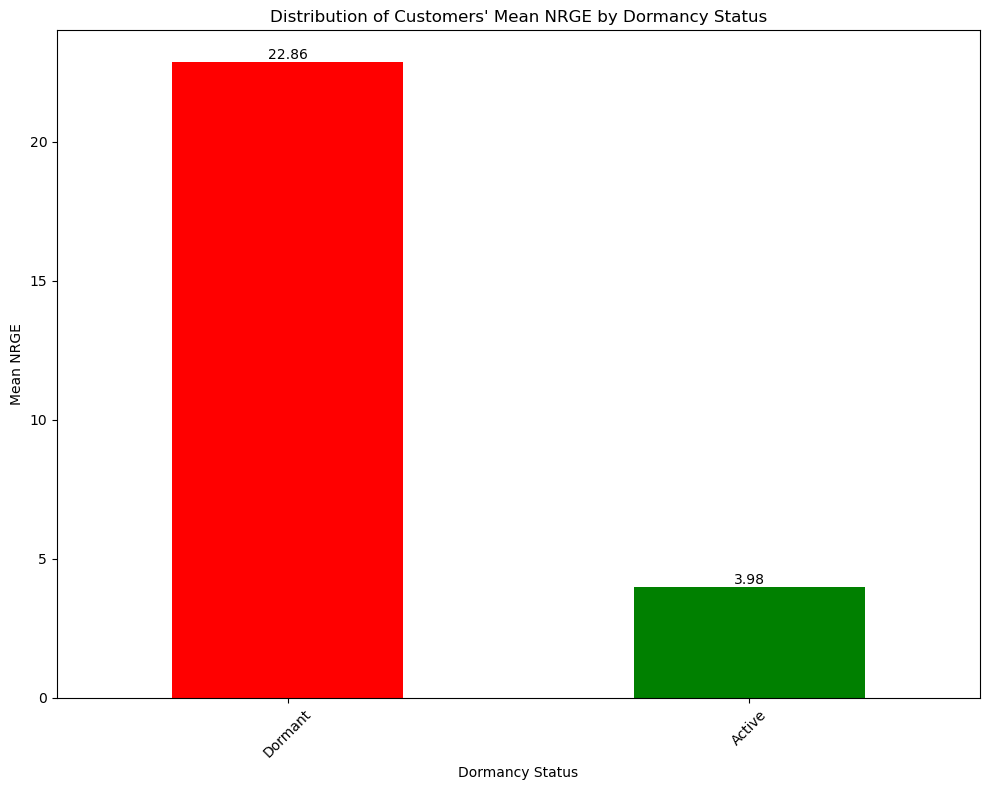

In [52]:
# Visualising the distribution of Customer's mean NRGE and percentage of customers based on their dormancy state.

# Calculate mean NRGE values grouped by DORMANCY_STATE
mean_nrge = df.groupby(['DORMANCY_STATE'])['NRGE'].agg('mean')

# Calculate percentage of customers in each dormancy status
#dormancy_percentages = df['DORMANCY_STATE'].value_counts(normalise=True) * 100

# Sort by mean NRGE values in descending order
mean_nrge = mean_nrge.sort_values(ascending=False)
#dormancy_percentages = dormancy_percentages.loc[mean_nrge.index]  # Reorder percentages to match mean_nrge order

# Create a vertical bar plot
plt.figure(figsize=(10, 8))
ax = mean_nrge.plot(kind='bar', color=['red', 'green'])

# Add labels and title
plt.title("Distribution of Customers' Mean NRGE by Dormancy Status")
plt.xlabel('Dormancy Status')
plt.ylabel('Mean NRGE')

# Add annotations for the percentage and mean NRGE values
for index, value in enumerate(mean_nrge):
    #percentage = dormancy_percentages[index]
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

    # Annotate with percentage
    #plt.text(index, value - 0.5, f'({percentage:.2f}%)', ha='center', va='bottom', color='black')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show plot
plt.show()

The plot above shows that the dormant class has the highest mean number of days without any revenue generating event.

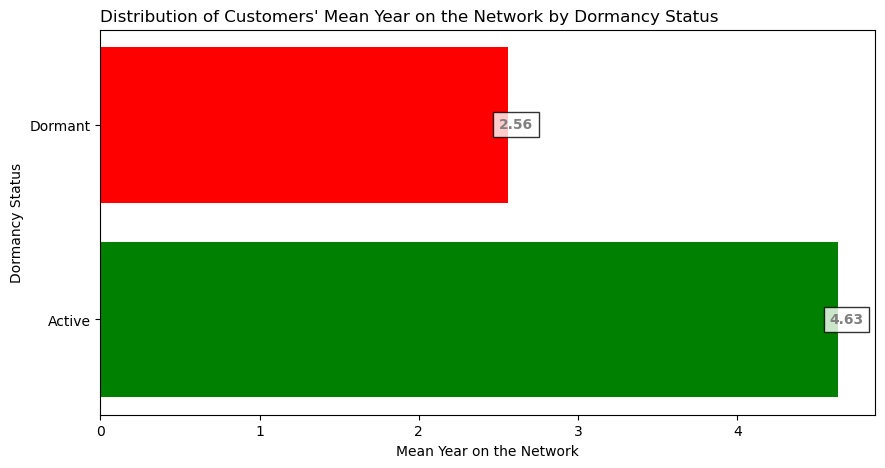

In [56]:
# Visualising the average YON for customers categorised by their dormancy status.

# YON - Year on the Network
cnt_by_yon_dormant_state = df[['DORMANCY_STATE', 'YON']].groupby(['DORMANCY_STATE'])['YON'].agg(mean = 'mean')

x1 = cnt_by_yon_dormant_state.index
y1 = cnt_by_yon_dormant_state['mean']

# Figure Size
fig, ax = plt.subplots(figsize =(10, 5))
#fig, ax = plt.subplots()

# Horizontal Bar Plot
ax.barh(x1, y1, color=['green', 'red'])

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.05, i.get_y()+0.38,
             f'{i.get_width():.2f}',
             ha = 'center',
             bbox = dict(facecolor = 'white', alpha =0.8),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title("Distribution of Customers' Mean Year on the Network by Dormancy Status",
             loc ='left', )

ax.set_ylabel('Dormancy Status')
ax.set_xlabel('Mean Year on the Network')

# Show Plot
plt.show()

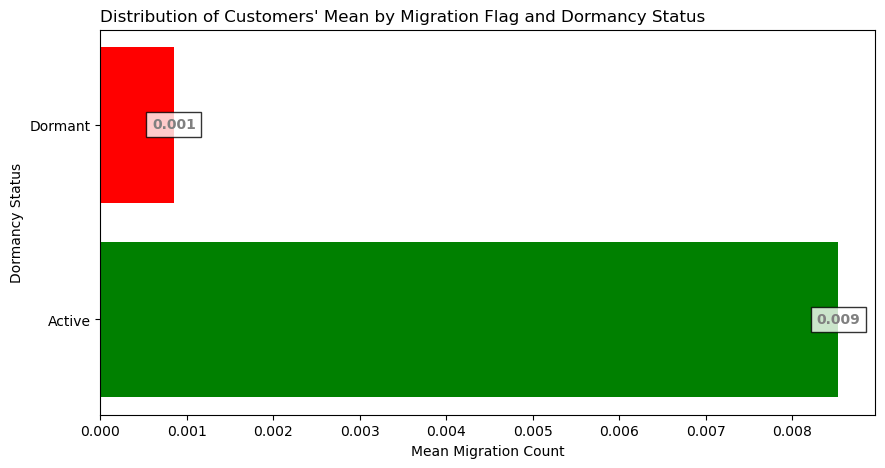

In [58]:
# Visualising the average Migration Count categorised by their dormancy status.

cnt_by_mig_dormant_state = df[['DORMANCY_STATE', 'MIGRATION_CNT']].groupby(['DORMANCY_STATE'])['MIGRATION_CNT'].agg(mean = 'mean')

x1 = cnt_by_mig_dormant_state.index
y1 = cnt_by_mig_dormant_state['mean']

# Figure Size
fig, ax = plt.subplots(figsize =(10, 5))
#fig, ax = plt.subplots()

# Horizontal Bar Plot
ax.barh(x1, y1, color=['green', 'red'])

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.0000001, i.get_y()+0.38,
             str(round((i.get_width()), 3)),
             ha = 'center',
             bbox = dict(facecolor = 'white', alpha =.8),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title("Distribution of Customers' Mean by Migration Flag and Dormancy Status",
             loc ='left', )

ax.set_ylabel('Dormancy Status')
ax.set_xlabel('Mean Migration Count')

# Show Plot
plt.show()

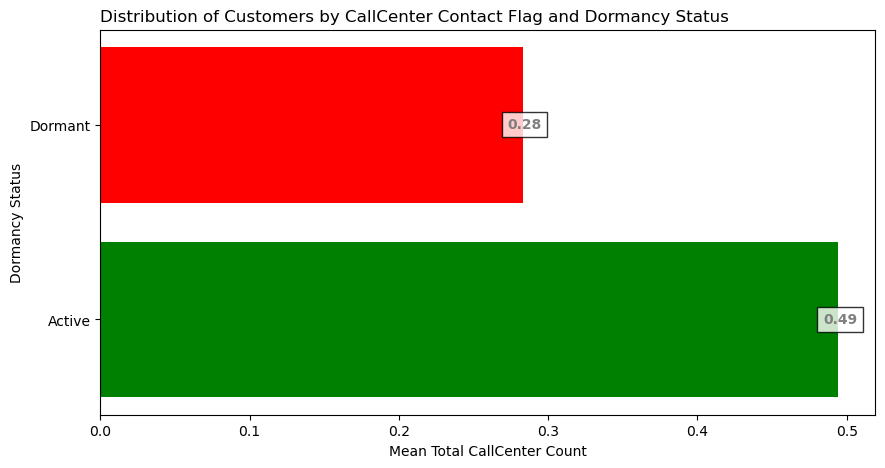

In [60]:
# Visualising the average Total no of call centre contacts for customers categorised by their dormancy status.

cnt_by_cc_dormant_state = df[['DORMANCY_STATE', 'TOTAL_NO_CC_CONTACT']].groupby(['DORMANCY_STATE'])['TOTAL_NO_CC_CONTACT'].agg(mean = 'mean')

x1 = cnt_by_cc_dormant_state.index
y1 = cnt_by_cc_dormant_state['mean']

# Figure Size
fig, ax = plt.subplots(figsize =(10, 5))
#fig, ax = plt.subplots()

# Horizontal Bar Plot
ax.barh(x1, y1, color=['green', 'red'])

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.001, i.get_y()+0.38,
             str(round((i.get_width()), 2)),
             ha = 'center',
             bbox = dict(facecolor = 'white', alpha =.8),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title("Distribution of Customers by CallCenter Contact Flag and Dormancy Status",
             loc ='left', )

ax.set_ylabel('Dormancy Status')
ax.set_xlabel('Mean Total CallCenter Count')

# Show Plot
plt.show()

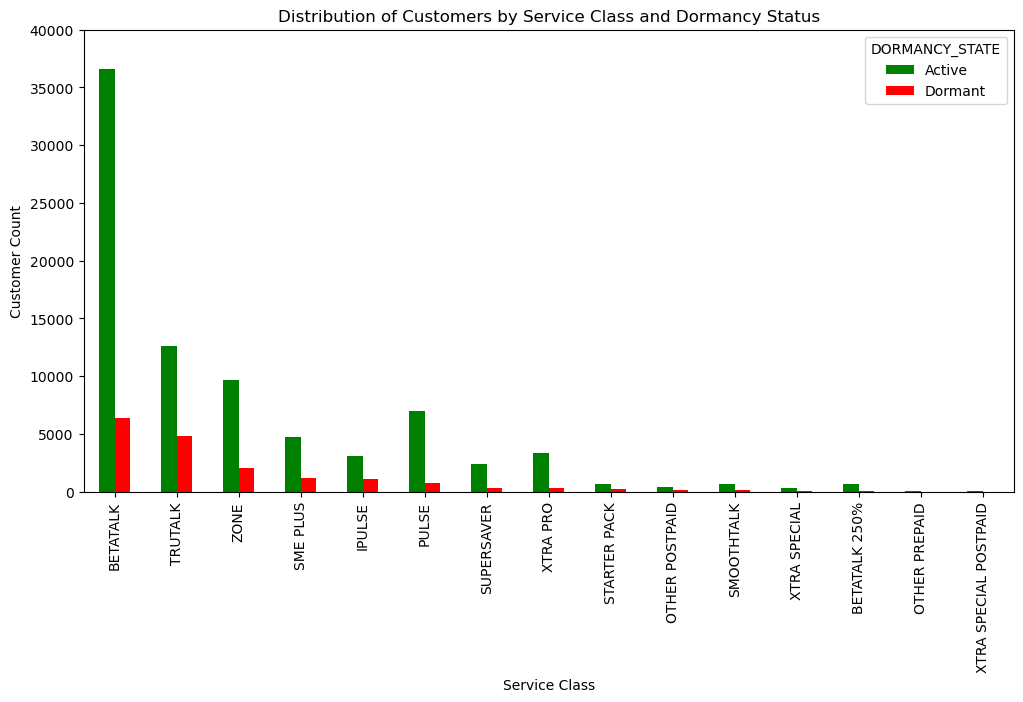

In [62]:
# Visualising the distribution of customers by the Service Class and Dormancy Status.

# Group by 'SERVICE_CLASS' and 'DORMANCY_STATE', and count the number of occurrences of each combination

d_service_cnt = df[['DORMANCY_STATE', 'SERVICE_CLASS']].groupby(['SERVICE_CLASS', 'DORMANCY_STATE'])['DORMANCY_STATE'].agg(cnt = 'count').reset_index()

# Create a pivot table from the grouped data, with 'SERVICE_CLASS' as rows and 'DORMANCY_STATE' as columns
# The values in the pivot table are the counts of each 'DORMANCY_STATE' per 'SERVICE_CLASS'
pd.pivot_table(d_service_cnt, index = 'SERVICE_CLASS', columns = 'DORMANCY_STATE', values = 'cnt').sort_values(by='Dormant', ascending=False).plot(kind = 'bar', color=['green', 'red'])

# Set the size of the plot
plt.gcf().set_size_inches(12, 6)

# Set the title of the plot
plt.title('Distribution of Customers by Service Class and Dormancy Status')

# Set the label for the y-axis and x- axis
plt.ylabel('Customer Count')
plt.xlabel('Service Class')

# Set the y-axis limit
plt.ylim(0, 40000)

# Display the plot
plt.show()

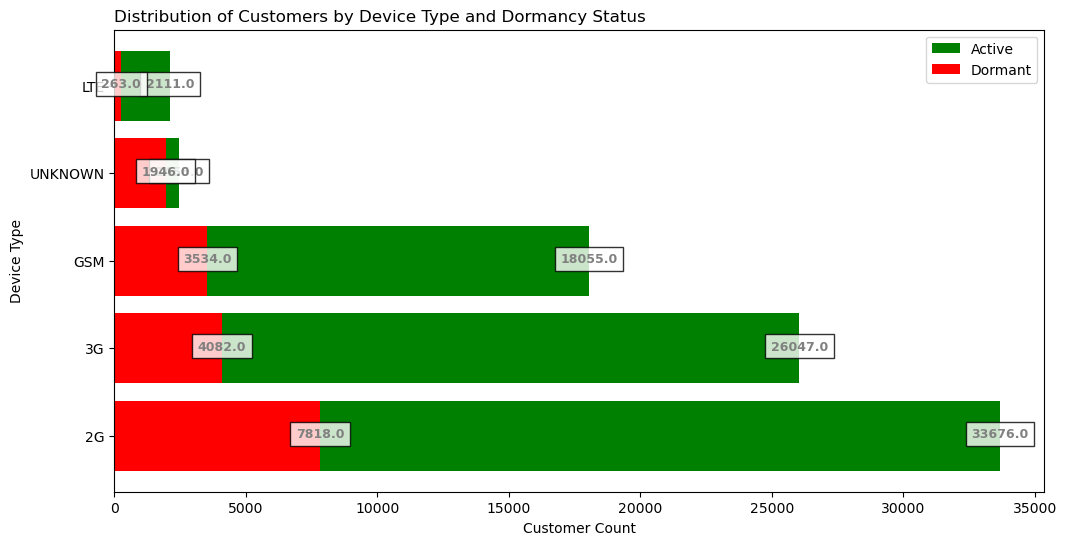

In [63]:
# Visualising the distribution of customers by device type and dormancy status.

d_device_cnt = df[['DORMANCY_STATE', 'DEVICE_TYPE']].groupby(['DEVICE_TYPE', 'DORMANCY_STATE'])['DORMANCY_STATE'].agg(cnt = 'count').reset_index()
d_device_cnt_pivot = pd.pivot_table(d_device_cnt, index = 'DEVICE_TYPE', columns = 'DORMANCY_STATE', values = 'cnt').sort_values(by='Dormant', ascending=False)


x1 = d_device_cnt_pivot.index
y1 = d_device_cnt_pivot['Active']
y2 = d_device_cnt_pivot['Dormant']

# Figure Size
fig, ax = plt.subplots(figsize =(12, 6))
#fig, ax = plt.subplots()

# Horizontal Bar Plot
ax.barh(x1, y1, color='green', label='Active')
ax.barh(x1, y2, color='red', label='Dormant')

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.001, i.get_y()+0.38,
             str(round((i.get_width()), 3)),
             ha = 'center',
             bbox = dict(facecolor = 'white', alpha =.8),
             fontsize = 9, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title("Distribution of Customers by Device Type and Dormancy Status",
             loc ='left', )

ax.set_ylabel('Device Type')
ax.set_xlabel('Customer Count')

plt.legend()

# Show Plot
plt.show()

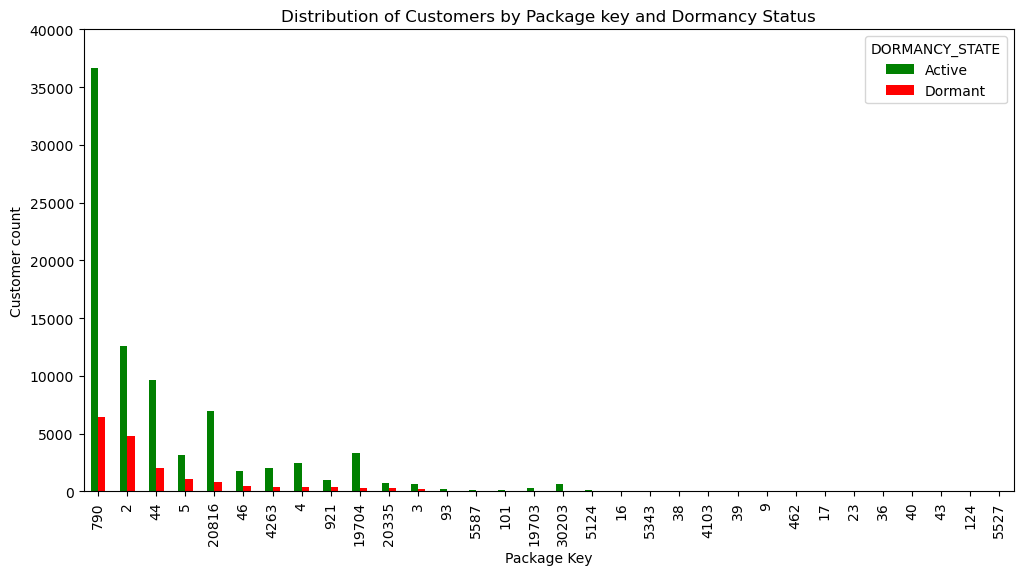

In [65]:
# Visualising the distribution of customers by package key and dormancy status.

d_pkg_cnt = df[['DORMANCY_STATE', 'PACKAGE_KEY']].groupby(['PACKAGE_KEY', 'DORMANCY_STATE'])['DORMANCY_STATE'].agg(cnt = 'count').reset_index()
pd.pivot_table(d_pkg_cnt, index = 'PACKAGE_KEY', columns = 'DORMANCY_STATE', values = 'cnt').sort_values(by='Dormant', ascending=False).plot(kind = 'bar', color=['green', 'red'])
plt.gcf().set_size_inches(12, 6)
plt.title('Distribution of Customers by Package key and Dormancy Status')
plt.ylabel('Customer count')
plt.xlabel('Package Key')
plt.ylim(0, 40000)
plt.show()

In [67]:
# Function to add data label to chart
def addlabels(x,y,bbox = dict(facecolor = 'white', alpha =.5), rotation='horizontal'):
    # Format if in thousands
    for i in range(len(x)):
        if y[i] < 1000:
            plt.text(i, y[i], '{:.1f}'.format(y[i]), ha = 'center', rotation = rotation,
                     bbox = bbox)
        else:
            plt.text(i, y[i], '{:6.1f}K'.format(y[i]/1000), ha = 'center', rotation = rotation,
                     bbox = bbox)

C:\Users\Susan Ololade\AppData\Local\Temp\ipykernel_13924\306332337.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if y[i] < 1000:
C:\Users\Susan Ololade\AppData\Local\Temp\ipykernel_13924\306332337.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], '{:6.1f}K'.format(y[i]/1000), ha = 'center', rotation = rotation,
C:\Users\Susan Ololade\AppData\Local\Temp\ipykernel_13924\306332337.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position

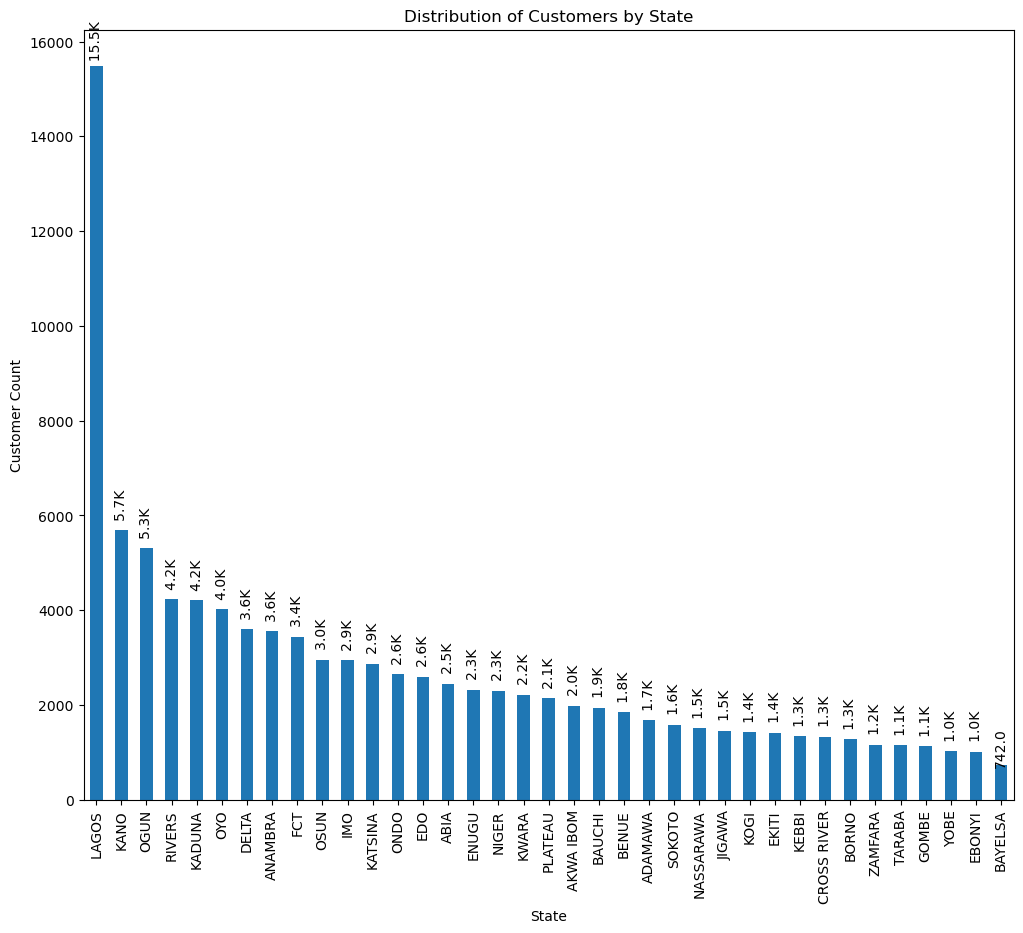

In [70]:
# Visualising the distribution of Customers by State

# Set the size of the figure
plt.figure(figsize=(12,10))

# Group the data by 'NGSTATE' column and count the number of occurrences for each state
# Sort the counts in descending order and plot as a bar chart
df[['NGSTATE']].groupby('NGSTATE')['NGSTATE'].count().sort_values(ascending=False).plot(kind = 'bar')

# Create a DataFrame with the count of customers per state
ngstate_cnt = df[['NGSTATE']].groupby('NGSTATE')['NGSTATE'].agg(cnt = 'count').sort_values(by='cnt', ascending=False)

# Add labels to the bars in the bar chart
# The addlabels function is assumed to be defined elsewhere
# It adds labels to each bar indicating the count of customers for each state
addlabels(ngstate_cnt.index, ngstate_cnt['cnt'], bbox=None, rotation = 'vertical')

# Set the title of the plot
plt.title('Distribution of Customers by State')

# Set the label for the y-axis and x-axis
plt.ylabel('Customer Count')
plt.xlabel('State')

# Display the plot
plt.show()

In [71]:
# Function to add data label to chart (Multiple column)
def addlabels_m(x,y,bbox = dict(facecolor = 'white', alpha =.2), rotation='horizontal', ha='center', fontsize=8):
    # Format if in thousands
    for i in range(len(x)):
        if y[i] < 1000:
            plt.text(i, y[i], '{:.1f}'.format(y[i]), ha = ha, rotation = rotation, fontsize=fontsize,
                     bbox = bbox)
        else:
            plt.text(i, y[i], '{:6.1f}K'.format(y[i]/1000), ha = ha, rotation = rotation, fontsize=fontsize,
                     bbox = bbox)

C:\Users\Susan Ololade\AppData\Local\Temp\ipykernel_13924\3717244310.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if y[i] < 1000:
C:\Users\Susan Ololade\AppData\Local\Temp\ipykernel_13924\3717244310.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], '{:6.1f}K'.format(y[i]/1000), ha = ha, rotation = rotation, fontsize=fontsize,
C:\Users\Susan Ololade\AppData\Local\Temp\ipykernel_13924\3717244310.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

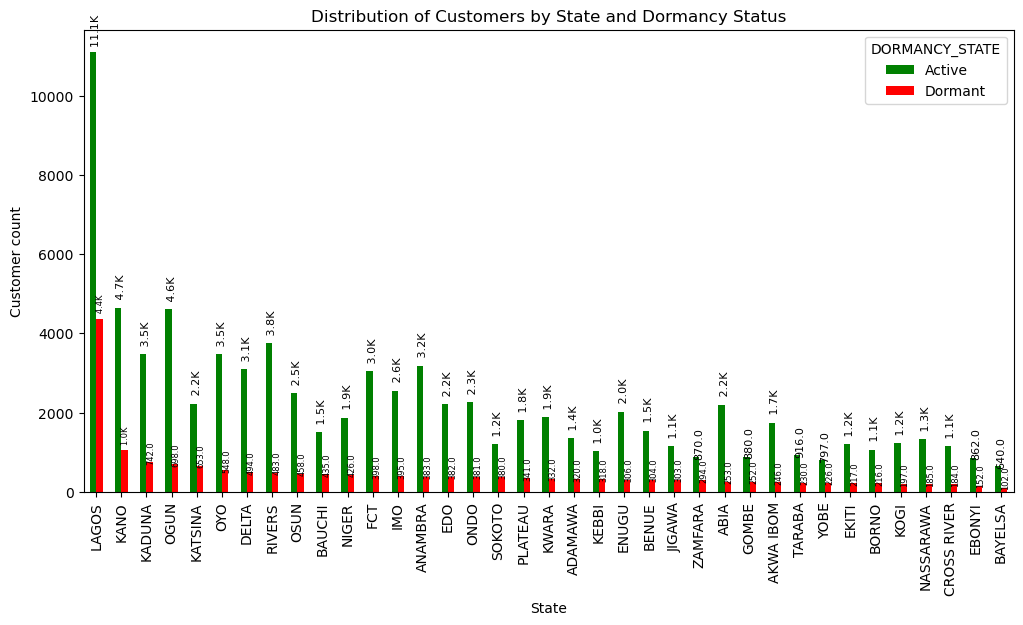

In [72]:
# Visualising the distribution of Customers by State and dormancy Status.

#plt.figure(figsize=(12,10))
# Group the data by 'NGSTATE' and 'DORMANCY_STATE', and count the occurrences of 'DORMANCY_STATE'
d_state_count = df[['NGSTATE','DORMANCY_STATE']].groupby(['NGSTATE', 'DORMANCY_STATE'])['DORMANCY_STATE'].agg(cnt = 'count').reset_index()
pd.pivot_table(d_state_count, index = 'NGSTATE', columns = 'DORMANCY_STATE', values = 'cnt').sort_values(by='Dormant', ascending=False).plot(kind = 'bar', color=['green', 'red'])
plt.gcf().set_size_inches(12, 6)

# Create a pivot table from the grouped data
# Rows are 'NGSTATE', columns are 'DORMANCY_STATE', and values are the counts ('cnt')
ngstate_dormancy_cnt = pd.pivot_table(d_state_count, index = 'NGSTATE', columns = 'DORMANCY_STATE', values = 'cnt').sort_values(by='Dormant', ascending=False)

# Add labels for the Active  and Dormant State.
addlabels_m(ngstate_dormancy_cnt.index, ngstate_dormancy_cnt['Active'], bbox=None, rotation = 'vertical')
addlabels_m(ngstate_dormancy_cnt.index, ngstate_dormancy_cnt['Dormant'], bbox=None, rotation = 'vertical', ha='left', fontsize=6)

# Set the title of the plot
plt.title('Distribution of Customers by State and Dormancy Status')

# Set the label for y-axis and x-axis
plt.ylabel('Customer count')
plt.xlabel('State')

# Show the plot
plt.show()

C:\Users\Susan Ololade\AppData\Local\Temp\ipykernel_13924\306332337.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if y[i] < 1000:
C:\Users\Susan Ololade\AppData\Local\Temp\ipykernel_13924\306332337.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], '{:6.1f}K'.format(y[i]/1000), ha = 'center', rotation = rotation,


Text(0.5, 0, 'GeoRegion')

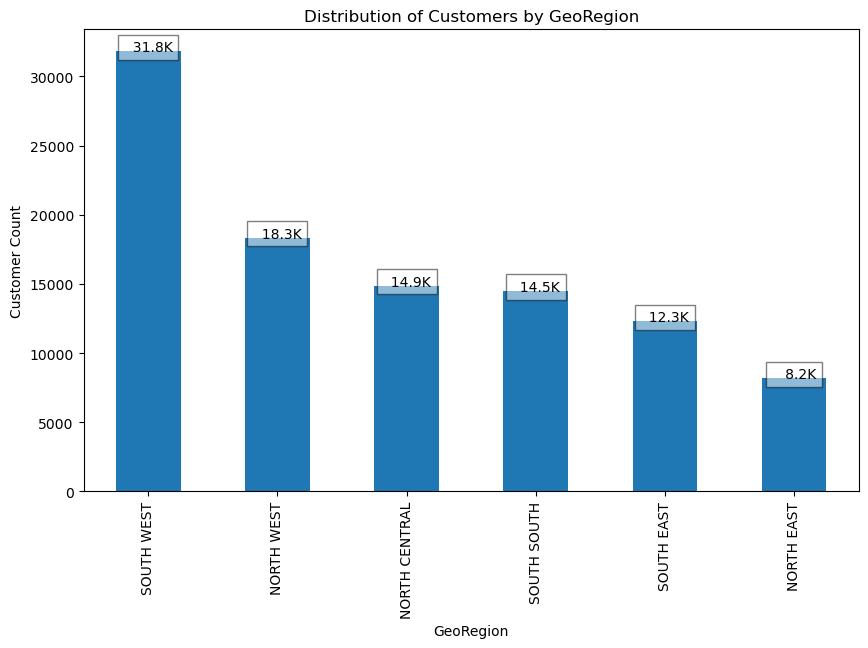

In [75]:
# Visualising the distribution of Customers by GeoRegion

# Set the figure size for the plot
plt.figure(figsize=(10,6))


# Create a bar plot showing the count of customers by GeoRegion, sorted in descending order
# df[['GEOREGION']]: Select the 'GEOREGION' column from the df DataFrame
# .groupby('GEOREGION')['GEOREGION'].count(): Group by 'GEOREGION' and count the number of occurrences for each region
# .sort_values(ascending=False): Sort the counts in descending order
# .plot(kind='bar'): Plot the counts as a bar chart
df[['GEOREGION']].groupby('GEOREGION')['GEOREGION'].count().sort_values(ascending=False).plot(kind = 'bar')

# Group by 'GEOREGION' and aggregate the counts, then sort by the count in descending order
region_cnt = df[['GEOREGION']].groupby('GEOREGION')['GEOREGION'].agg(cnt='count').sort_values(by='cnt', ascending=False)

# Add labels to the bar plot and Rotates the labels horizontally for better readability
addlabels(region_cnt.index, region_cnt['cnt'], rotation = 'horizontal')

# Set the title of the plot
plt.title('Distribution of Customers by GeoRegion')

# Set the label for y-axis and x-axis
plt.ylabel('Customer Count')
plt.xlabel('GeoRegion')

# Display 

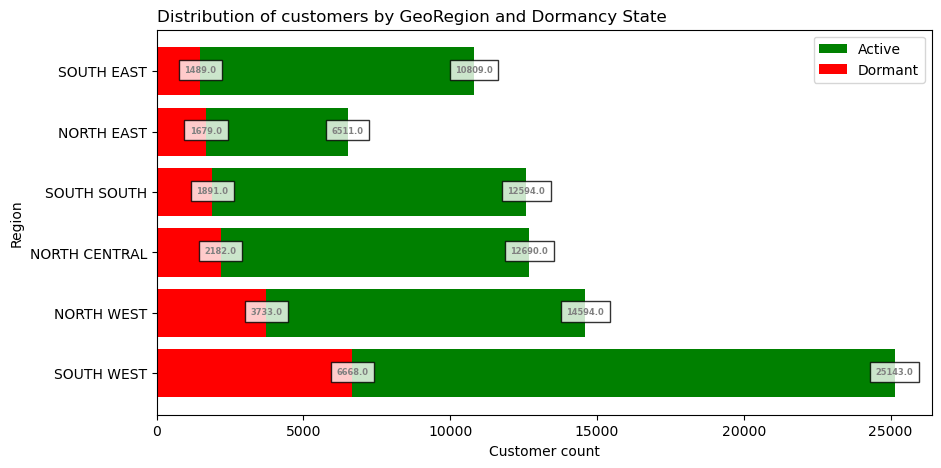

In [76]:
# Visualising the distribution of Customers by GeoRegion and dormancy status.

d_region_count = df[['GEOREGION','DORMANCY_STATE']].groupby(['GEOREGION', 'DORMANCY_STATE'])['DORMANCY_STATE'].agg(cnt = 'count').reset_index()
d_region_count_pivot = pd.pivot_table(d_region_count, index = 'GEOREGION', columns = 'DORMANCY_STATE', values = 'cnt').sort_values(by='Dormant', ascending=False)

x1 = d_region_count_pivot.index
y1 = d_region_count_pivot['Active']
y2 = d_region_count_pivot['Dormant']

# Figure Size
fig, ax = plt.subplots(figsize =(10, 5))
#fig, ax = plt.subplots()

# Horizontal Bar Plot
ax.barh(x1, y1, color='green', label='Active')
ax.barh(x1, y2, color='red', label='Dormant')

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.001, i.get_y()+0.38,
             str(round((i.get_width()), 3)),
             ha = 'center',
             bbox = dict(facecolor = 'white', alpha =.8),
             fontsize = 6, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title("Distribution of customers by GeoRegion and Dormancy State",
             loc ='left', )

ax.set_ylabel('Region')
ax.set_xlabel('Customer count')

plt.legend()
# Show Plot
plt.show()

C:\Users\Susan Ololade\AppData\Local\Temp\ipykernel_13924\306332337.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if y[i] < 1000:
C:\Users\Susan Ololade\AppData\Local\Temp\ipykernel_13924\306332337.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], '{:6.1f}K'.format(y[i]/1000), ha = 'center', rotation = rotation,


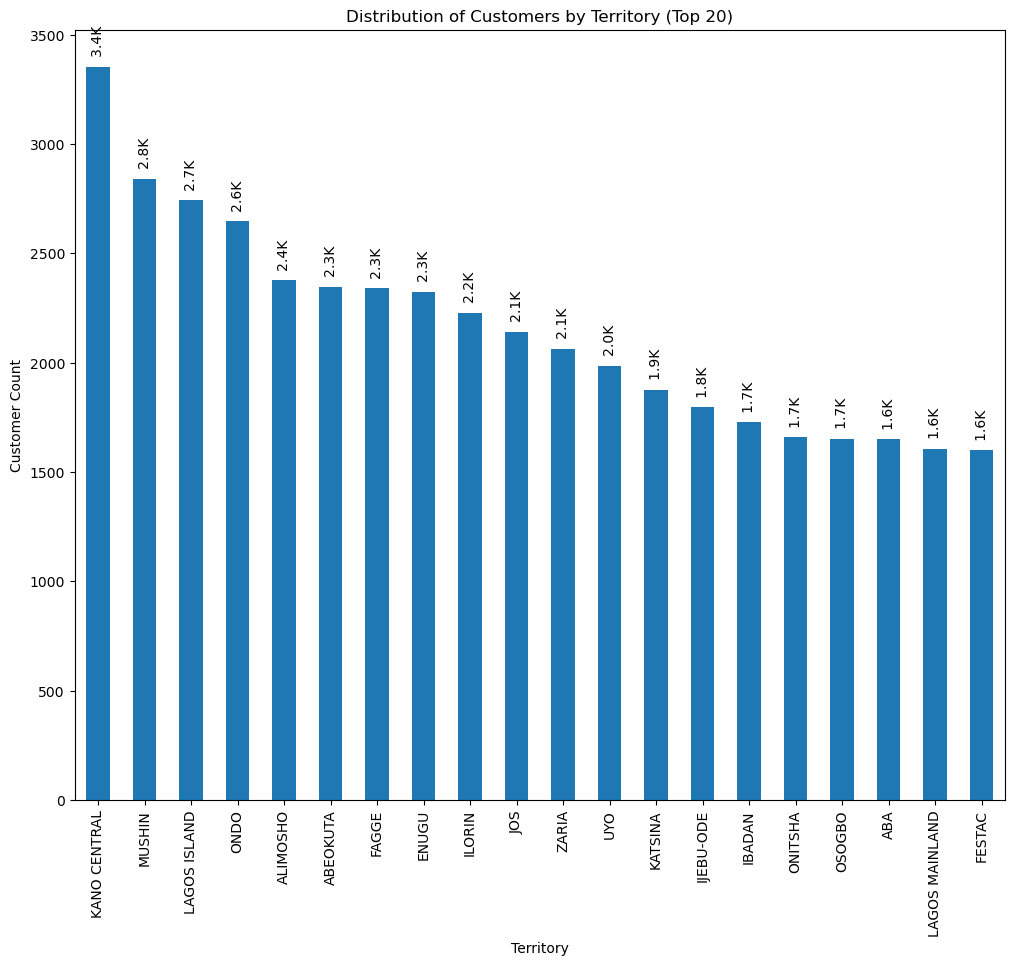

In [78]:
# Visualising the distriution of Customers by Territory

plt.figure(figsize=(12,10))
df[['TERRITORY']].groupby('TERRITORY')['TERRITORY'].count().sort_values(ascending=False).head(20).plot(kind = 'bar')
terr_cnt = df[['TERRITORY']].groupby('TERRITORY')['TERRITORY'].agg(cnt = 'count').sort_values(by='cnt', ascending=False).head(20)
addlabels(terr_cnt.index, terr_cnt['cnt'], bbox=None, rotation = 'vertical')
plt.title('Distribution of Customers by Territory (Top 20)')
plt.ylabel('Customer Count')
plt.xlabel('Territory')
plt.show()

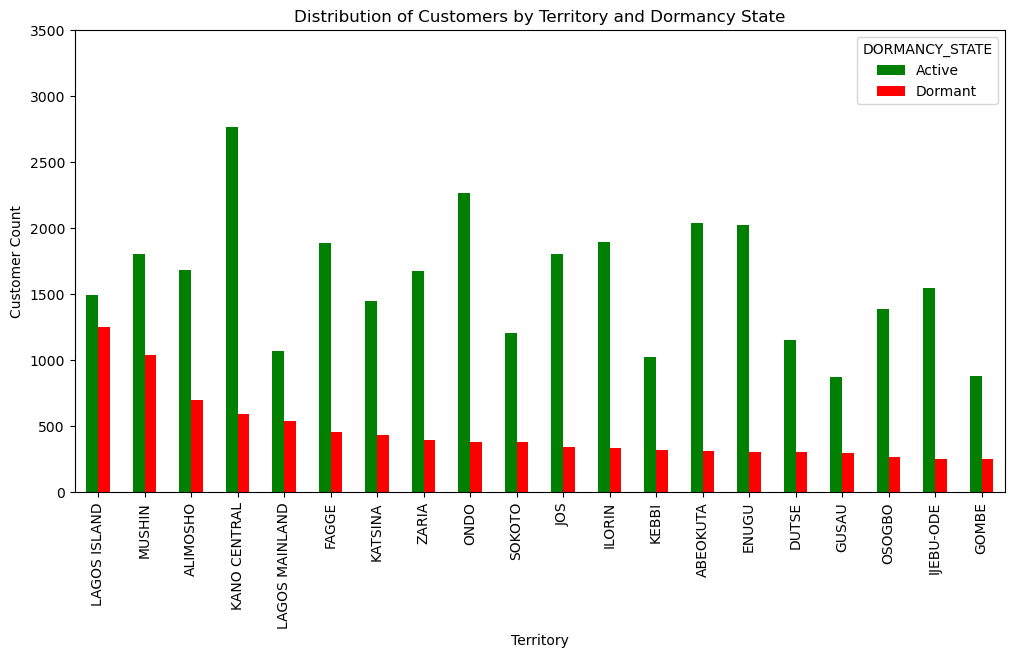

In [79]:
# Visualising the distribution of customers by Territory and dormancy status.

d_region_count = df[['TERRITORY','DORMANCY_STATE']].groupby(['TERRITORY', 'DORMANCY_STATE'])['DORMANCY_STATE'].agg(cnt = 'count').reset_index()
pd.pivot_table(d_region_count, index = 'TERRITORY', columns = 'DORMANCY_STATE', values = 'cnt').sort_values(by='Dormant', ascending=False).head(20).plot(kind = 'bar', color=['green', 'red'])
plt.gcf().set_size_inches(12, 6)
plt.title('Distribution of Customers by Territory and Dormancy State')
plt.ylabel('Customer Count')
plt.xlabel('Territory')
plt.ylim(0, 3500)
plt.show()

### Frequency of the Categorical features using Pie Chart

#### Data Usage

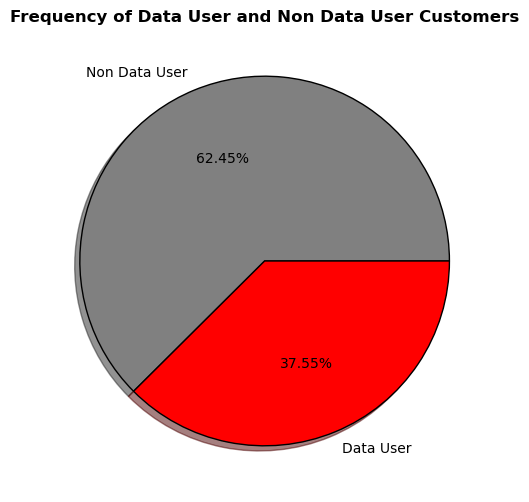

In [86]:
# Frequency of Data Usage categories
freq = df['DATA_USAGE'].value_counts()

# Labels for the pie chart
labels = ['Non Data User', 'Data User']

# Create the pie chart
fig = plt.figure(figsize=(8, 6))
plt.title('Frequency of Data User and Non Data User Customers', weight="bold")
plt.pie(freq, labels=labels, shadow=True, autopct="%1.2f%%", wedgeprops={"edgecolor": "black"}, colors=["grey", "red"])

# Display the pie chart
plt.show()

#### SMS Usage

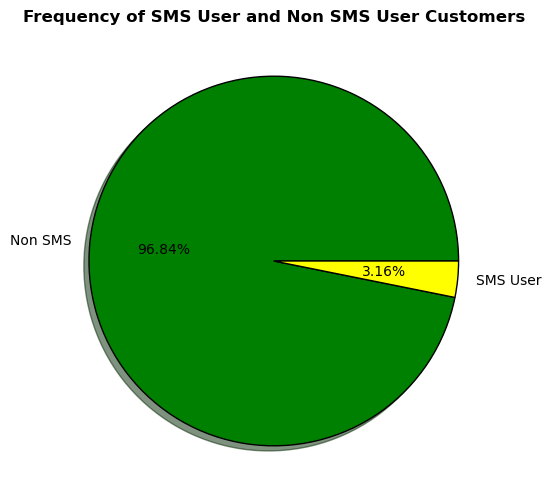

In [89]:
# Frequency of SMS Usage categories
freq = df['SMS_USAGE'].value_counts()

# Labels for the pie chart
labels = ['Non SMS', 'SMS User']

# Create the pie chart
fig = plt.figure(figsize=(8, 6))
plt.title('Frequency of SMS User and Non SMS User Customers', weight="bold")
plt.pie(freq, labels=labels, shadow=True, autopct="%1.2f%%", wedgeprops={"edgecolor": "black"}, colors=["green", "yellow"])

# Display the pie chart
plt.show()

#### Voice Usage

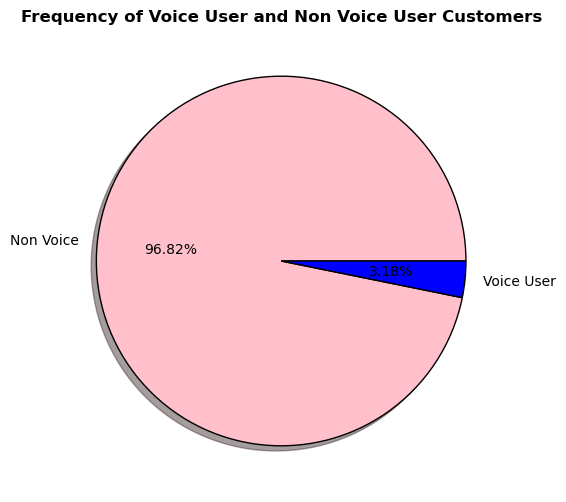

In [92]:
# Frequency of Voice Usage categories
freq = df['VOICE_USAGE'].value_counts()

# Labels for the pie chart
labels = ['Non Voice', 'Voice User']

# Create the pie chart
fig = plt.figure(figsize=(8, 6))
plt.title('Frequency of Voice User and Non Voice User Customers', weight="bold")
plt.pie(freq, labels=labels, shadow=True, autopct="%1.2f%%", wedgeprops={"edgecolor": "black"}, colors=["pink", "blue"])

# Display the pie chart
plt.show()

**Showing number of Observations using countplot**

DATA_USAGE
Data User    62446
Non Data     37541
Name: count, dtype: int64

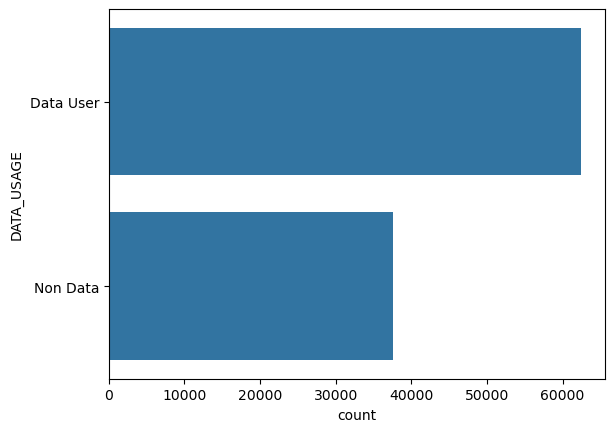

In [95]:
sns.countplot(df["DATA_USAGE"])

# Displays the count of both data user and data user customers
df.DATA_USAGE.value_counts()

SMS_USAGE
SMS User    96827
Non SMS      3160
Name: count, dtype: int64

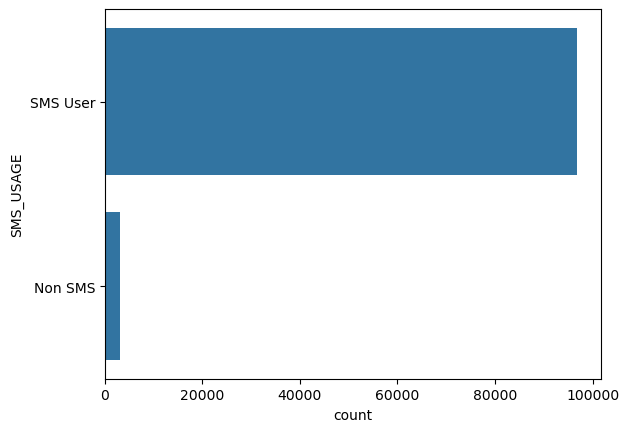

In [97]:
sns.countplot(df["SMS_USAGE"])

# Displays the count of both sms user and non sms user customers
df.SMS_USAGE.value_counts()

VOICE_USAGE
Voice User    96806
Non-Voice      3181
Name: count, dtype: int64

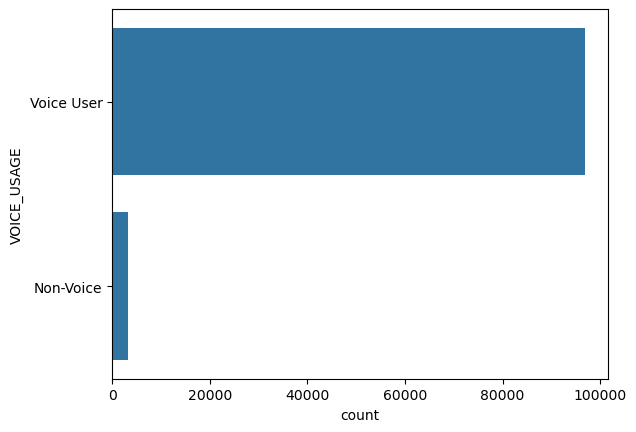

In [99]:
sns.countplot(df["VOICE_USAGE"])

# Displays the count of both voice user and non voice user customers
df.VOICE_USAGE.value_counts()

**Using Correlation Heatmap to show the relationship between different features present in the Dormancy Records Dataset**

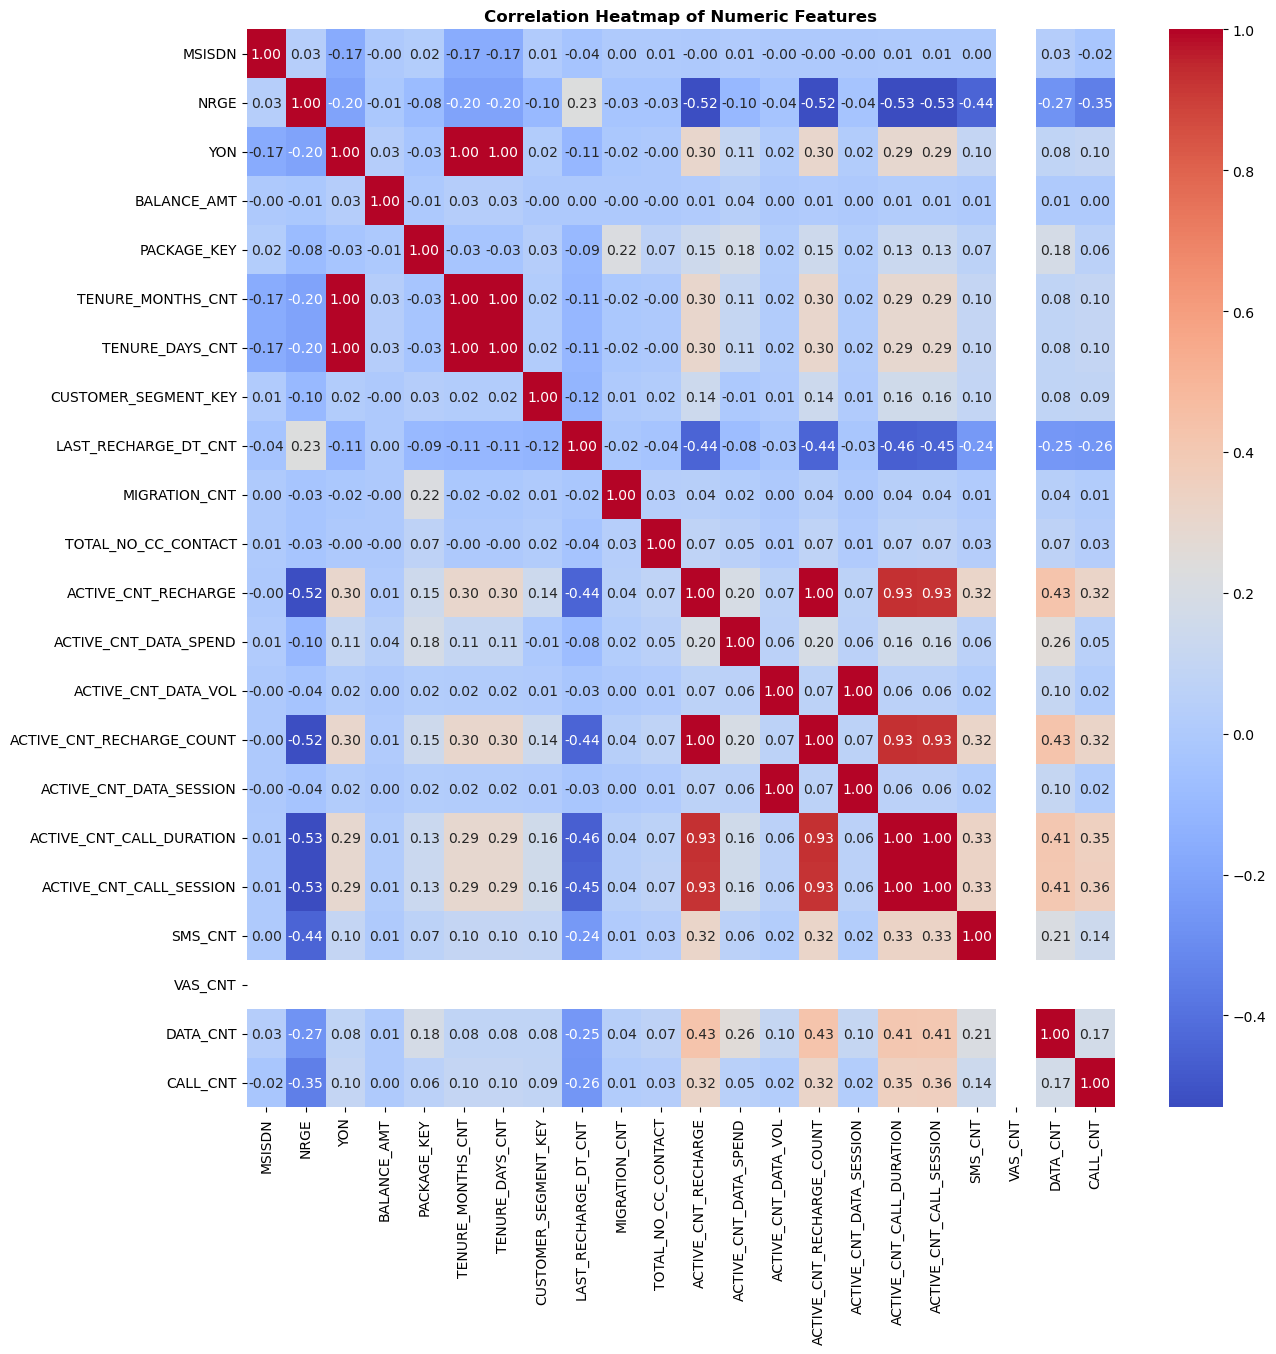

In [102]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlations = numeric_df.corr(method="pearson")

# Plot the heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features", weight="bold")
plt.show()


### Using Chi-Square Test of Independence for Feature Selection

Chi-Square Test which is a traditional approached is used.

**Chi-Square:**
The Chi-Square test is a statistical test that can be used to determine the significance of features in machine learning for selection purposes. It is often used to analyse the independence of two category variables. It can be used to determine whether a feature and a target variable have a strong relation (Turhan, 2020).

### The Selected Features with their corresponding p-values

In [112]:

# df is the dataframe that contains the 'DORMANCY_STATE' column
# Initialise the feature matrix and target vector
# By doing this, the DORMANCY_STATE column will not be dropped
X = df.drop(columns=['DORMANCY_STATE'], errors='ignore')  # Drop only if it exists
y = df['DORMANCY_STATE']  # Target variable

# Initialises an empty list to store the p-values
p_values = []

# Looping through each feature column in the matrix
for feature in X.columns:
    # Calculates the Chi-Square test and p-value
    stat, p, dof, expected = chi2_contingency(pd.crosstab(X[feature], y))
    p_values.append(p)

# Creates a dataframe to store the p-values and feature names
p_values_df = pd.DataFrame({'feature': X.columns, 'p_value': p_values})

# Select the features with a p-value below 0.05 and sort them by p-value
selected_features = p_values_df[p_values_df['p_value'] < 0.05].sort_values(by='p_value')

# Use the selected features for model training
X_selected = X[selected_features['feature']]

# Display the selected features and their p-values
print("Selected Features based on Chi-Square Test:")
print(selected_features)

Selected Features based on Chi-Square Test:
                      feature        p_value
1                        NRGE   0.000000e+00
30                  SMS_USAGE   0.000000e+00
29                 DATA_USAGE   0.000000e+00
28                  TERRITORY   0.000000e+00
27                    NGSTATE   0.000000e+00
25              SERVICE_CLASS   0.000000e+00
24                   CALL_CNT   0.000000e+00
23                   DATA_CNT   0.000000e+00
21                    SMS_CNT   0.000000e+00
20                    TENUREX   0.000000e+00
19                DEVICE_TYPE   0.000000e+00
18    ACTIVE_CNT_CALL_SESSION   0.000000e+00
17   ACTIVE_CNT_CALL_DURATION   0.000000e+00
31                VOICE_USAGE   0.000000e+00
32                SERVICE_CNT   0.000000e+00
12        ACTIVE_CNT_RECHARGE   0.000000e+00
11               LAST_TX_TYPE   0.000000e+00
8        LAST_RECHARGE_DT_CNT   0.000000e+00
7        CUSTOMER_SEGMENT_KEY   0.000000e+00
6             TENURE_DAYS_CNT   0.000000e+00
5          

The output displayed above shows the selected features with their corresponding p-values

### All Features with their corresponding p-values

In [133]:
p_values_df

,feature,p_value
32,SERVICE_CNT,0.000000e+00
21,SMS_CNT,0.000000e+00
20,TENUREX,0.000000e+00
19,DEVICE_TYPE,0.000000e+00
18,ACTIVE_CNT_CALL_SESSION,0.000000e+00
17,ACTIVE_CNT_CALL_DURATION,0.000000e+00
31,VOICE_USAGE,0.000000e+00
15,ACTIVE_CNT_RECHARGE_COUNT,0.000000e+00
28,TERRITORY,0.000000e+00
25,SERVICE_CLASS,0.000000e+00


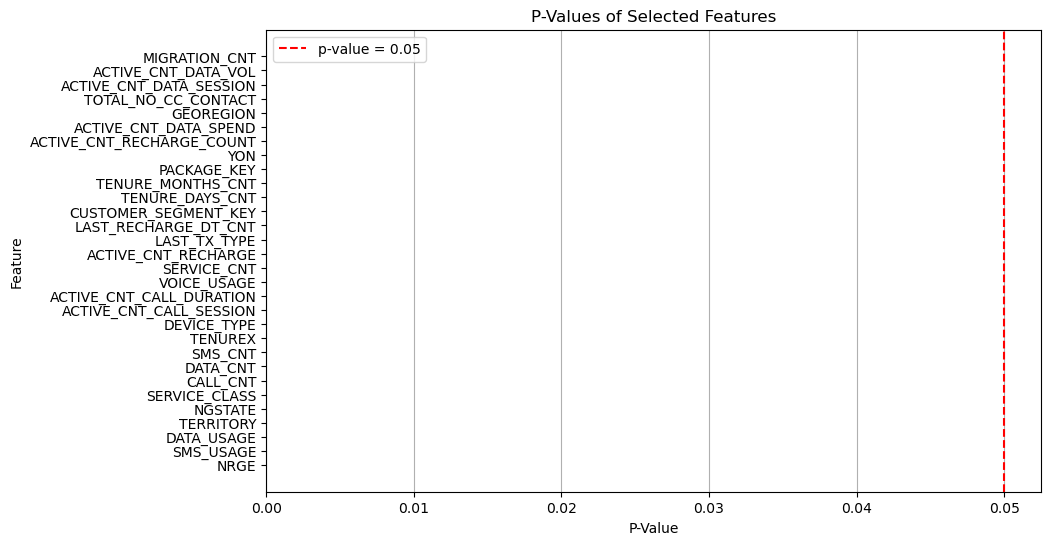

In [129]:
# Visusalising the p-values of the selected features based on the Chi-Square Test

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(y=selected_features['feature'], width=selected_features['p_value'], color='skyblue')

# Set the y-axis labels
plt.yticks(rotation=0)

# Add a title and labels to the axes
plt.title("P-Values of Selected Features")
plt.xlabel("P-Value")
plt.ylabel("Feature")

# Display the plot
plt.axvline(x=0.05, color='red', linestyle='--', label='p-value = 0.05')
plt.legend()
plt.grid(axis='x')
plt.show()

The output above shows the selected features and their p-value

In [142]:
final_df = pd.concat([X_selected, y], axis=1)
final_df

,NRGE,SMS_USAGE,DATA_USAGE,TERRITORY,NGSTATE,SERVICE_CLASS,CALL_CNT,DATA_CNT,SMS_CNT,TENUREX,...,PACKAGE_KEY,YON,ACTIVE_CNT_RECHARGE_COUNT,ACTIVE_CNT_DATA_SPEND,GEOREGION,TOTAL_NO_CC_CONTACT,ACTIVE_CNT_DATA_SESSION,ACTIVE_CNT_DATA_VOL,MIGRATION_CNT,DORMANCY_STATE
0,0,SMS User,Data User,KADUNA NORTH,KADUNA,BETATALK,1,1,1,04 25-48 months,...,790,2,4,0,NORTH WEST,0,0,0,0,Active
1,0,SMS User,Data User,KANO CENTRAL,KANO,TRUTALK,1,1,1,04 25-48 months,...,2,2,4,0,NORTH WEST,0,0,0,0,Active
2,1,SMS User,Non Data,IJEBU-ODE,OGUN,BETATALK,1,0,1,03 13-24 months,...,790,1,4,0,SOUTH WEST,0,0,0,0,Active
3,2,SMS User,Non Data,LAGOS MAINLAND,LAGOS,BETATALK,1,0,1,05 Above 4 years,...,790,10,4,0,SOUTH WEST,0,0,0,0,Active
4,2,SMS User,Data User,KATAGUM,BAUCHI,BETATALK,1,1,1,05 Above 4 years,...,790,5,4,0,NORTH EAST,0,0,0,0,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,SMS User,Non Data,OWERRI 1,IMO,ZONE,1,0,1,04 25-48 months,...,44,3,4,0,SOUTH EAST,0,0,0,0,Active
99996,0,SMS User,Non Data,WARRI,DELTA,BETATALK,1,0,1,03 13-24 months,...,790,1,4,0,SOUTH SOUTH,0,0,0,0,Active
99997,0,SMS User,Data User,KEFFI,NASSARAWA,BETATALK,1,1,1,04 25-48 months,...,790,3,3,0,NORTH CENTRAL,0,0,0,0,Active
99998,0,SMS User,Data User,KATSINA,KATSINA,TRUTALK,1,1,1,04 25-48 months,...,2,3,4,0,NORTH WEST,0,0,0,0,Active


#### Checking for Class Imbalance

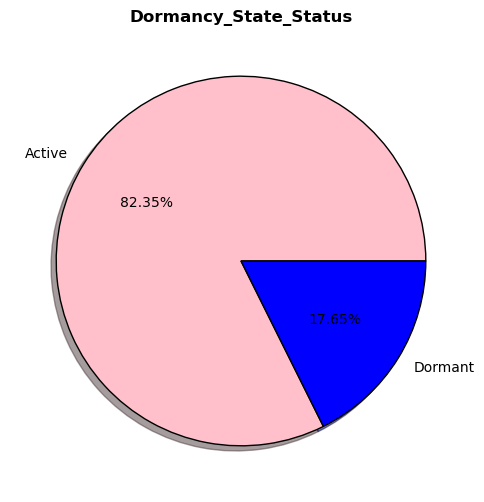

In [145]:
# Checking the datset for class imbalance 
freq = final_df['DORMANCY_STATE'].value_counts()

# Labels for the pie chart
labels = ['Active', 'Dormant']

# Create the pie chart
fig = plt.figure(figsize=(8, 6))
plt.title('Dormancy_State_Status', weight="bold")
plt.pie(freq, labels=labels, shadow=True, autopct="%1.2f%%", wedgeprops={"edgecolor": "black"}, colors=["pink", "blue"])

# Display the pie chart
plt.show()

From the pie chart above, the degree of class imbalance is seen in the dataset. 

In [148]:
final_df['DORMANCY_STATE'] = final_df['DORMANCY_STATE'].map({'Active': 0, 'Dormant': 1})


# Seperate the data into two classes
Active = final_df[final_df['DORMANCY_STATE'] == 0]
Dormant = final_df[final_df['DORMANCY_STATE'] == 1]

# print the shapes of the class
print('Active shape: {}'.format(Active.shape))
print('Dormant shape: {}'.format(Dormant.shape))

Active shape: (82344, 31)
Dormant shape: (17643, 31)


In [150]:
# Categorical data
categorical_cols = ['DEVICE_TYPE', 'TENUREX', 'LAST_TX_TYPE', 'SERVICE_CLASS', 'GEOREGION', 'NGSTATE', 'TERRITORY', 'DATA_USAGE', 'SMS_USAGE', 'VOICE_USAGE', 'SERVICE_CNT']
# import pandas as pd
df = pd.get_dummies(final_df, columns = categorical_cols)

In [152]:
# Separating the class into class 0 and class 1
class_0 = df[df["DORMANCY_STATE"] == 0]
class_1 = df[df["DORMANCY_STATE"] == 1]

In [154]:
# Print the shape of the class
print("class 0:", class_0.shape)
print("\nclass 1:", class_1.shape)

class 0: (82344, 182)

class 1: (17643, 182)


To address the class imbalance for the expected outcome i.e. dormancy_state, Random Over-Sampling which is a resampling technique for class imbalance was applied to increase the number of data that falls under the class - 'dormant'

In [157]:

# Separate the features and target variable
X = df.drop(columns=["DORMANCY_STATE"])
y = df["DORMANCY_STATE"]

# Apply oversampling to the data
rs = RandomOverSampler(random_state=42)
X_resampled, y_resampled = rs.fit_resample(X, y)

# Data is split into training and temporary sets (test + validation)
X_train, X_test_validation, y_train, y_test_validation = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

# Split the temporary set into testing and validation sets
X_test, X_val, y_test, y_val = train_test_split(
    X_test_validation, y_test_validation, test_size=0.3333, random_state=42, stratify=y_test_validation
)

# Summary of Splitting
# - X_train, y_train: Training set (70% of resampled data)
# - X_val, y_val: Validation set (10% of resampled data)
# - X_test, y_test: Test set (20% of resampled data)


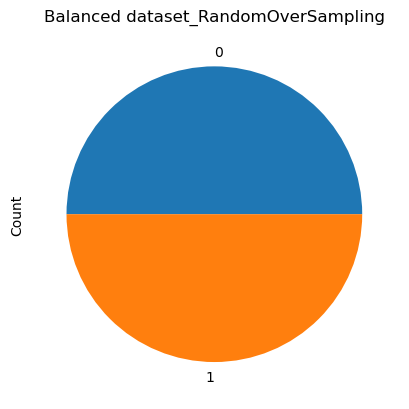

In [158]:
# Count the number of occurrences of each class in the balanced dataset
class_counts_resampled = pd.Series(y_resampled).value_counts()

# plot the class distribution
class_counts_resampled.plot(kind='pie')
#plt.xlabel("DORMANCY_STATE")
plt.ylabel("Count")
plt.title("Balanced dataset_RandomOverSampling")
plt.show()

### Building the Models using GridSearchCV

### Logistic Regression

In [163]:
# Logistic Regression
t0 = time.time()

lr = LogisticRegression()
lr_params = {'C': [0.01, 0.1, 1, 10]}
lr_grid = GridSearchCV(lr, lr_params, scoring='accuracy')
lr_grid.fit(X_train, y_train)
print(f"\nBest params for Logistic Regression: {lr_grid.best_params_}")

t1 = time.time()
print(f'Time taken to run LR: {t1-t0}')

C:\Users\Susan Ololade\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Susan Ololade\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr


Best params for Logistic Regression: {'C': 1}
Time taken to run LR: 70.0528290271759


C:\Users\Susan Ololade\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### K-Nearest Neighbours

In [166]:
# KNN
t0 = time.time()

knn = KNeighborsClassifier()
# Define the parameter space for the grid search
knn_params = {'n_neighbors': [3, 5, 7, 9]}

# Perform the grid search
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')

#trains the model
knn_grid.fit(X_train, y_train)

print(f"\nBest params for KNN: {knn_grid.best_params_}")

t1 = time.time()
print(f'Time taken to run KNN: {t1-t0}')


Best params for KNN: {'n_neighbors': 3}
Time taken to run KNN: 1302.9791040420532


### Decision Tree

In [169]:
# Decision Tree
t0 = time.time()

dt = DecisionTreeClassifier()

# Define the parameter space for the grid search
dt_params = {'max_depth': [3, 5, 7, 9]}

# Perform the grid search
dt_grid = GridSearchCV(dt, dt_params, scoring='accuracy')
dt_grid.fit(X_train, y_train)
print(f"\nBest params for Decision Tree: {dt_grid.best_params_}")

t1 = time.time()
print(f'Time taken to run DT: {t1-t0}')


Best params for Decision Tree: {'max_depth': 9}
Time taken to run DT: 30.26081085205078


### Random Forest Classifier

In [172]:
# Random Forest Classifier
t0 = time.time()

rf = RandomForestClassifier()
rf_params = {'n_estimators': [100, 200], 'max_depth': [3, 5, 7, 9]}
rf_grid = GridSearchCV(rf, rf_params, scoring='accuracy')
rf_grid.fit(X_train, y_train)
print(f"\nBest params for Random Forest: {rf_grid.best_params_}")

t1 = time.time()
print(f'Time taken to run RF: {t1-t0}')


Best params for Random Forest: {'max_depth': 9, 'n_estimators': 100}
Time taken to run RF: 479.65794229507446


In [174]:
models = {
    "KNN": knn_grid,
    "Decision Tree": dt_grid,
    "Logistic Regression": lr_grid,
    "Random Forest": rf_grid
}

In [176]:
results = []

for name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Adjusting pos_label to match the correct numeric label, assuming 1 represents 'Dormant'
    pos_label = 1

    # Calculates evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    recall = recall_score(y_test, y_pred, pos_label=pos_label)
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)

    # Append the results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

    # Print classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

    # Print confusion matrix
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

print("\nEvaluation Results:")
print(results_df)



Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88     16470
           1       0.85      0.96      0.90     16469

    accuracy                           0.89     32939
   macro avg       0.90      0.89      0.89     32939
weighted avg       0.90      0.89      0.89     32939

Confusion Matrix for KNN:
[[13627  2843]
 [  709 15760]]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.91      0.83      0.86     16470
           1       0.84      0.91      0.88     16469

    accuracy                           0.87     32939
   macro avg       0.87      0.87      0.87     32939
weighted avg       0.87      0.87      0.87     32939

Confusion Matrix for Decision Tree:
[[13595  2875]
 [ 1416 15053]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83  

### Confusion Matrix for K-Nearest Neighbours

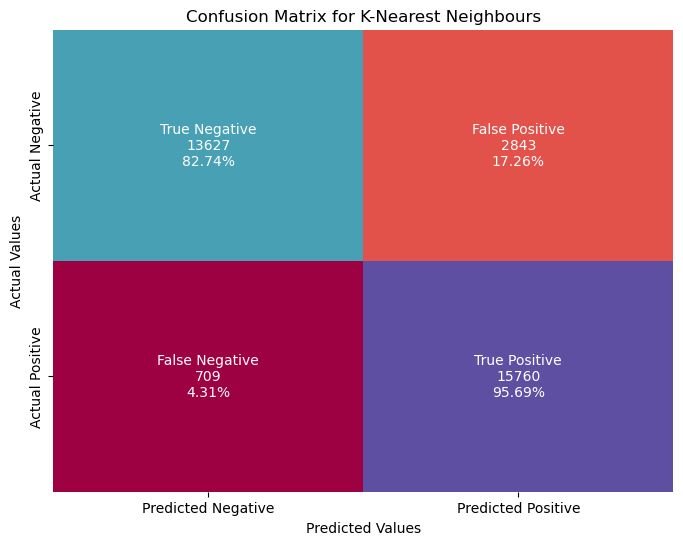

In [249]:
# KNN
# Confusion matrix values
confusion_matrix = np.array([[13627,  2843],
                             [709, 15760]])

# Calculate the percentages for each cell in the confusion matrix
confusion_matrix_percentages = confusion_matrix / confusion_matrix.sum(axis=1)[:, np.newaxis]

# Custom group names
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]

# Create formatted labels for each cell including group names, counts, and percentages
labels = [f"{group}\n{value}\n{percentage:.2%}" for group, value, percentage in zip(group_names, confusion_matrix.flatten(), confusion_matrix_percentages.flatten())]
labels = np.array(labels).reshape(2, 2)

# Plotting the confusion matrix with values and percentages
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Spectral', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for K-Nearest Neighbours')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### Confusion Matrix for Decision Tree

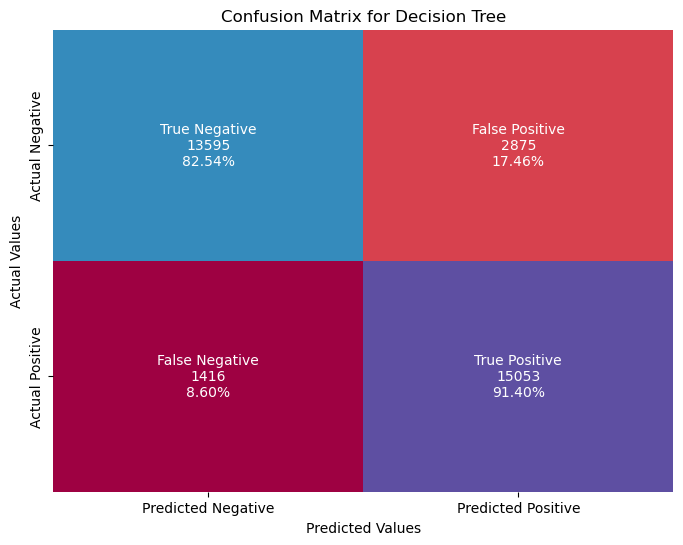

In [247]:
# Decision Tree
# Confusion matrix values for Decision Tree
confusion_matrix = np.array([[13595, 2875],
                             [1416, 15053]])

# Calculate the percentages for each cell in the confusion matrix
confusion_matrix_percentages = confusion_matrix / confusion_matrix.sum(axis=1)[:, np.newaxis]

# Custom group names
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]

# Create formatted labels for each cell including group names, counts, and percentages
labels = [f"{group}\n{value}\n{percentage:.2%}" for group, value, percentage in zip(group_names, confusion_matrix.flatten(), confusion_matrix_percentages.flatten())]
labels = np.array(labels).reshape(2, 2)

# Plotting the confusion matrix with values and percentages
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Spectral', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### Confusion Matrix for Logistic Regression

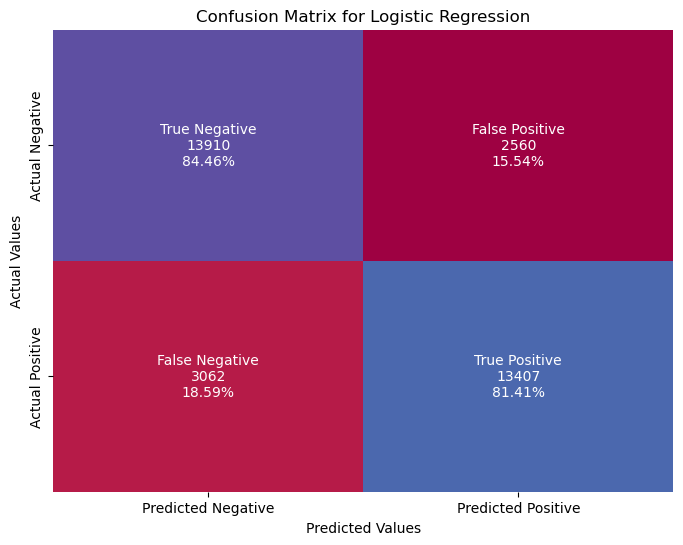

In [253]:
# Logistic Regression
# Confusion matrix values for Logistic Regression (LR)
confusion_matrix = np.array([[13910, 2560],
                             [3062, 13407]])

# Calculate the percentages for each cell in the confusion matrix
confusion_matrix_percentages = confusion_matrix / confusion_matrix.sum(axis=1)[:, np.newaxis]

# Custom group names
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]

# Create formatted labels for each cell including group names, counts, and percentages
labels = [f"{group}\n{value}\n{percentage:.2%}" for group, value, percentage in zip(group_names, confusion_matrix.flatten(), confusion_matrix_percentages.flatten())]
labels = np.array(labels).reshape(2, 2)

# Plotting the confusion matrix with values and percentages
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Spectral', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### Confusion Matrix for Random Forest Classifier

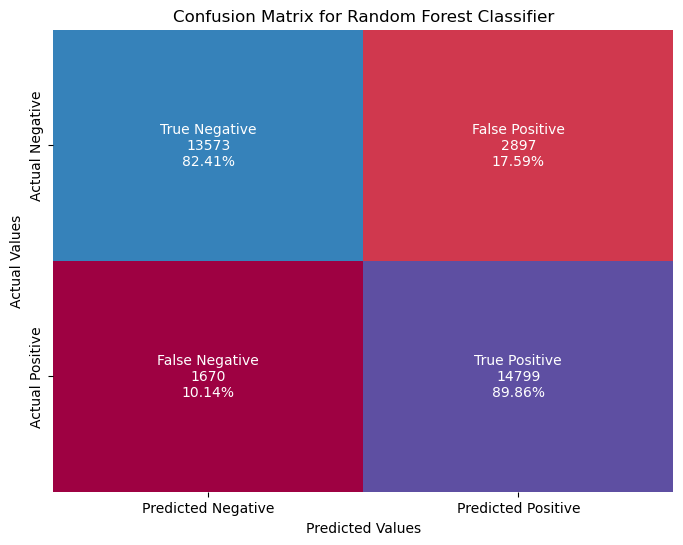

In [255]:
# Random Forest Classifier
# Confusion matrix values for Random Forest Classifier
confusion_matrix = np.array([[13573, 2897],
                             [1670, 14799]])

# Calculate the percentages for each cell in the confusion matrix
confusion_matrix_percentages = confusion_matrix / confusion_matrix.sum(axis=1)[:, np.newaxis]

# Custom group names
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]

# Create formatted labels for each cell including group names, counts, and percentages
labels = [f"{group}\n{value}\n{percentage:.2%}" for group, value, percentage in zip(group_names, confusion_matrix.flatten(), confusion_matrix_percentages.flatten())]
labels = np.array(labels).reshape(2, 2)

# Plotting the confusion matrix with values and percentages
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Spectral', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

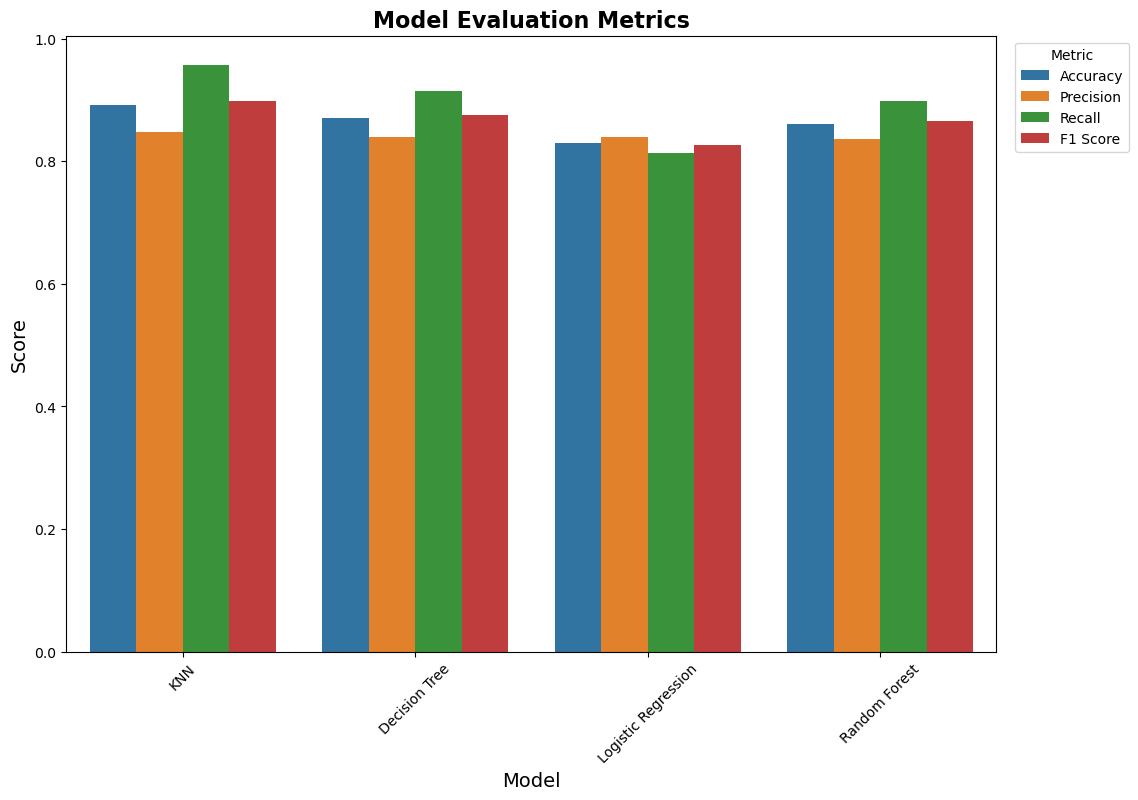

In [194]:

# 'results_df' is the dataframe containing the evaluation results
data = {
    "Model": ["KNN", "Decision Tree", "Logistic Regression", "Random Forest"],
    "Accuracy": [0.892164, 0.869729, 0.829321, 0.861350],
    "Precision": [0.847175, 0.839636, 0.839669, 0.836291],
    "Recall": [0.956949, 0.914020, 0.814075, 0.898597],
    "F1 Score": [0.898723, 0.875251, 0.826674, 0.866325]
}

results_df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(12, 8))

# Melt the DataFrame to have 'Metric' as a variable
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Create a grouped bar plot
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted)

# Add the title and labels
plt.title("Model Evaluation Metrics", fontsize=16, weight="bold")
plt.xlabel("Model", fontsize=14)
plt.ylabel("Score", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Place the legend at the top right
plt.legend(title="Metric", loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the plot
plt.show()

In [258]:
# 'results_df' is the dataframe containing the evaluation results

data = {
    "Model": ["KNN", "Decision Tree", "Logistic Regression", "Random Forest"],
    "Accuracy": [0.892164, 0.869729, 0.829321, 0.861350],
    "Precision": [0.847175, 0.839636, 0.839669, 0.836291],
    "Recall": [0.956949, 0.914020, 0.814075, 0.898597],
    "F1 Score": [0.898723, 0.875251, 0.826674, 0.866325]
}

results_df = pd.DataFrame(data)

# Identify the best model based on Recall
best_model = results_df.loc[results_df['Recall'].idxmax()]

# Display the best model
print("Best Model based on Recall:")
print(best_model)

Best Model based on Recall:
Model             KNN
Accuracy     0.892164
Precision    0.847175
Recall       0.956949
F1 Score     0.898723
Name: 0, dtype: object


### Validation Set

### K-Nearest Neighbours Training and Validation Accuracy

In [201]:
# KNN

# Start timing
t0 = time.time()

# Create KNN classifier
knn = KNeighborsClassifier()

# Define the parameter space for the grid search
knn_params = {'n_neighbors': [3, 5, 7, 9]}

# Perform the grid search with cross-validation on the training set
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy', return_train_score=True)

# Train the model on the training set
knn_grid.fit(X_train, y_train)

# Print the best parameters found by grid search
print(f"\nBest params for KNN: {knn_grid.best_params_}")

# Evaluate the best model on the training set
best_knn_model = knn_grid.best_estimator_
y_train_pred = best_knn_model.predict(X_train)

# Calculate the accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate the best model on the validation set
y_val_pred = best_knn_model.predict(X_val)

# Calculate the accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Print classification report for the validation set
print("\nClassification Report for Validation Set:")
print(classification_report(y_val, y_val_pred))

# End timing
t1 = time.time()
print(f'Time taken to run KNN: {t1 - t0:.2f} seconds')


Best params for KNN: {'n_neighbors': 3}
Training Accuracy: 0.9389
Validation Accuracy: 0.8886

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      8234
           1       0.84      0.96      0.90      8234

    accuracy                           0.89     16468
   macro avg       0.90      0.89      0.89     16468
weighted avg       0.90      0.89      0.89     16468

Time taken to run KNN: 7758.52 seconds


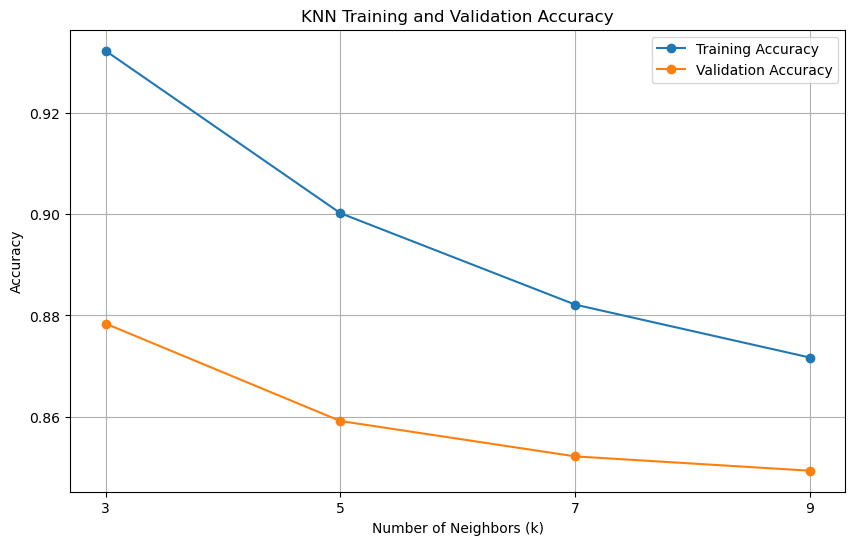

In [203]:
# KNN

# Extract the training and validation scores
train_scores = knn_grid.cv_results_['mean_train_score']
val_scores = knn_grid.cv_results_['mean_test_score']
n_neighbors = knn_params['n_neighbors']

# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, train_scores, label='Training Accuracy', marker='o')
plt.plot(n_neighbors, val_scores, label='Validation Accuracy', marker='o')
plt.title('KNN Training and Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(n_neighbors)
plt.legend()
plt.grid()
plt.show()

### Logistics Regression Training and Validation Accuracy

In [206]:

# Logistic Regression

# Start timing
t0 = time.time()

# Create Logistic Regression classifier
lr = LogisticRegression()

# Define the parameter space for the grid search
lr_params = {'C': [0.01, 0.1, 1, 10]}

# Perform the grid search with cross-validation on the training set
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy', return_train_score=True)

# Train the model on the training set
lr_grid.fit(X_train, y_train)

# Print the best parameters found by grid search
print(f"\nBest params for Logistic Regression: {lr_grid.best_params_}")

# Evaluate the best model on the training set
best_lr_model = lr_grid.best_estimator_
y_train_pred = best_lr_model.predict(X_train)

# Calculate the accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate the best model on the validation set
y_val_pred = best_lr_model.predict(X_val)

# Calculate the accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Print classification report for the validation set
print("\nClassification Report for Validation Set:")
print(classification_report(y_val, y_val_pred))

# End timing
t1 = time.time()
print(f'Time taken to run Logistic Regression: {t1 - t0:.2f} seconds')


C:\Users\Susan Ololade\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Susan Ololade\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr


Best params for Logistic Regression: {'C': 1}
Training Accuracy: 0.8275
Validation Accuracy: 0.8218

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      8234
           1       0.83      0.81      0.82      8234

    accuracy                           0.82     16468
   macro avg       0.82      0.82      0.82     16468
weighted avg       0.82      0.82      0.82     16468

Time taken to run Logistic Regression: 81.52 seconds


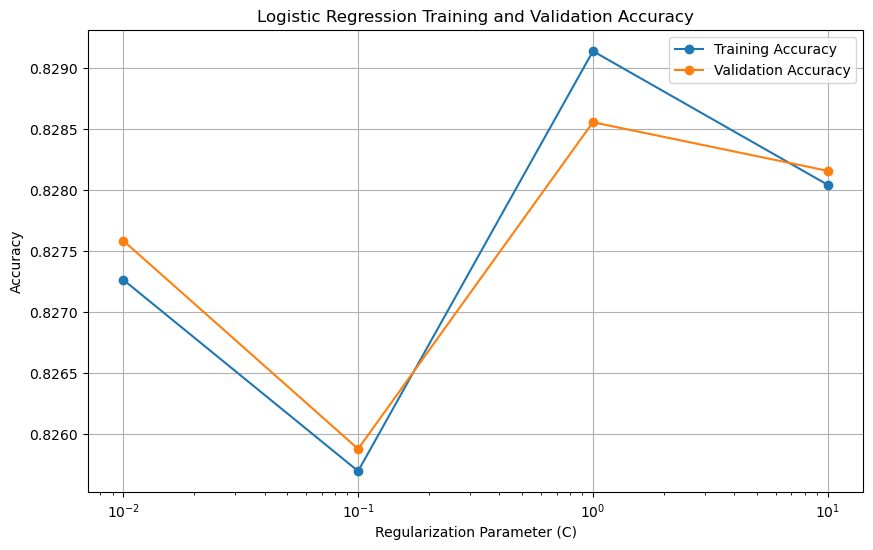

In [210]:
# Logistic Regression

# Extract the training and validation scores
train_scores = lr_grid.cv_results_['mean_train_score']
val_scores = lr_grid.cv_results_['mean_test_score']
C_values = lr_params['C']

# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, label='Training Accuracy', marker='o')
plt.plot(C_values, val_scores, label='Validation Accuracy', marker='o')
plt.title('Logistic Regression Training and Validation Accuracy')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.xscale('log')  # Use logarithmic scale for C values
plt.xticks(C_values)
plt.legend()
plt.grid()
plt.show()

### Decision Tree Training and Validation Accuracy

In [217]:
# Decision Tree

# Start timing
t0 = time.time()

# Create Decision Tree classifier
dt = DecisionTreeClassifier()

# Define the parameter space for the grid search
dt_params = {'max_depth': [3, 5, 7, 9]}

# Perform the grid search with cross-validation on the training set
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', return_train_score=True)

# Train the model on the training set
dt_grid.fit(X_train, y_train)

# Print the best parameters found by grid search
print(f"\nBest params for Decision Tree: {dt_grid.best_params_}")

# Evaluate the best model on the training set
best_dt_model = dt_grid.best_estimator_
y_train_pred = best_dt_model.predict(X_train)

# Calculate the accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate the best model on the validation set
y_val_pred = best_dt_model.predict(X_val)

# Calculate the accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Print classification report for the validation set
print("\nClassification Report for Validation Set:")
print(classification_report(y_val, y_val_pred))

# End timing
t1 = time.time()
print(f'Time taken to run Decision Tree: {t1 - t0:.2f} seconds')



Best params for Decision Tree: {'max_depth': 9}
Training Accuracy: 0.8776
Validation Accuracy: 0.8662

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      8234
           1       0.83      0.92      0.87      8234

    accuracy                           0.87     16468
   macro avg       0.87      0.87      0.87     16468
weighted avg       0.87      0.87      0.87     16468

Time taken to run Decision Tree: 30.70 seconds


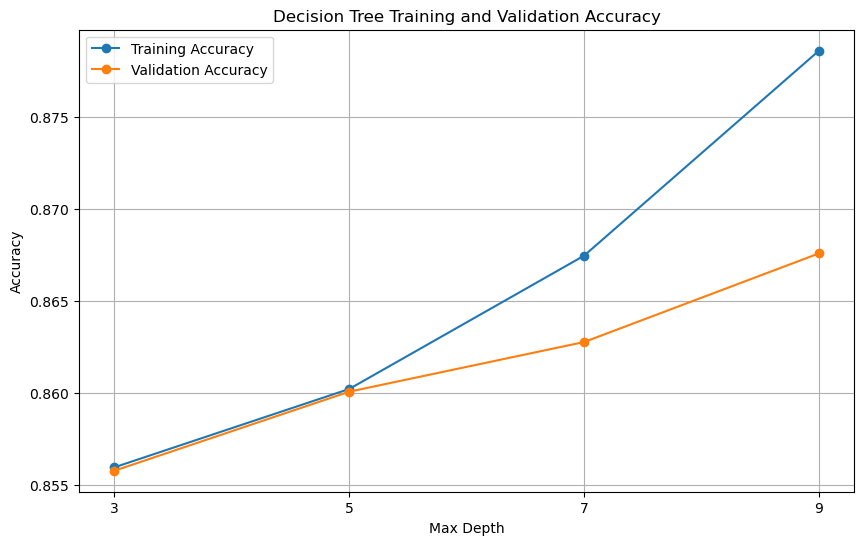

In [219]:
# Decision Tree

# Extract the training and validation scores
train_scores = dt_grid.cv_results_['mean_train_score']  
val_scores = dt_grid.cv_results_['mean_test_score']  
max_depths = dt_grid.param_grid['max_depth'] 

# Plotting Training and Validation Accuracy for Decision Tree
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Training Accuracy', marker='o')
plt.plot(max_depths, val_scores, label='Validation Accuracy', marker='o')
plt.title('Decision Tree Training and Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depths)
plt.grid()
plt.legend()
plt.show()

### Random Forest Classifier Training and Validation Accuracy 

In [222]:
# Random Forest Classifier

# Start timing for Random Forest
t0 = time.time()

# Create Random Forest classifier
rf = RandomForestClassifier()

# Define the parameter space for the grid search
rf_params = {
    'n_estimators': [100, 200], 
    'max_depth': [3, 5, 7, 9]
}

# Perform the grid search with cross-validation on the training set
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', return_train_score=True)

# Train the model on the training set
rf_grid.fit(X_train, y_train)

# Print the best parameters found by grid search
print(f"\nBest params for Random Forest: {rf_grid.best_params_}")

# Evaluate the best model on the training set
best_rf_model = rf_grid.best_estimator_
y_train_pred = best_rf_model.predict(X_train)

# Calculate the accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate the best model on the validation set
y_val_pred = best_rf_model.predict(X_val)

# Calculate the accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Print classification report for the validation set
print("\nClassification Report for Validation Set:")
print(classification_report(y_val, y_val_pred))

# End timing
t1 = time.time()
print(f'Time taken to run Random Forest: {t1 - t0:.2f} seconds')



Best params for Random Forest: {'max_depth': 9, 'n_estimators': 200}
Training Accuracy: 0.8624
Validation Accuracy: 0.8540

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      8234
           1       0.83      0.90      0.86      8234

    accuracy                           0.85     16468
   macro avg       0.86      0.85      0.85     16468
weighted avg       0.86      0.85      0.85     16468

Time taken to run Random Forest: 538.99 seconds


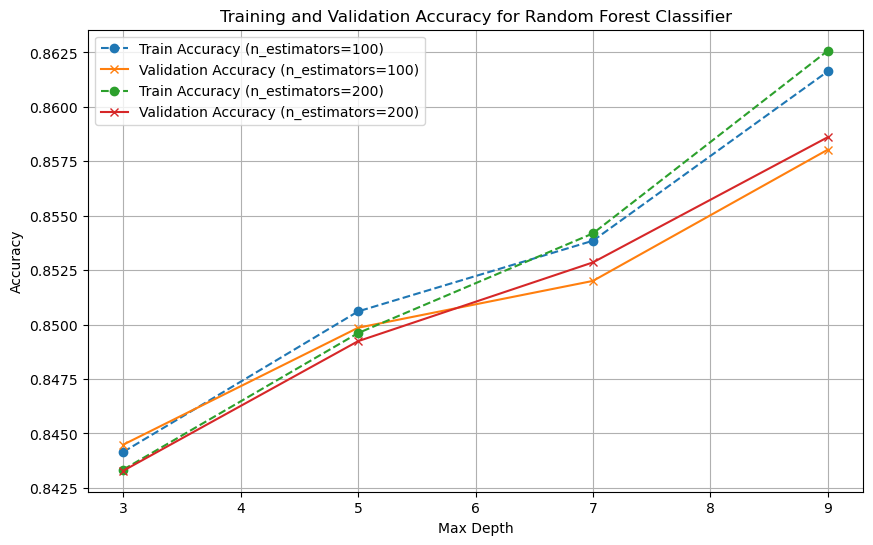

In [230]:
# Random Forest Classifier 

# Extract results from the grid search
results = rf_grid.cv_results_

# Training and validation accuracy mean scores
train_mean_accuracy = results['mean_train_score']
val_mean_accuracy = results['mean_test_score']

# Get parameter values for n_estimators and max_depth
param_n_estimators = results['param_n_estimators'].data.astype(int)
param_max_depth = results['param_max_depth'].data.astype(int)

# Plotting the training and validation accuracy from the grid search
plt.figure(figsize=(10, 6))
for n_est in np.unique(param_n_estimators):
    # Filter results for a particular number of estimators
    idx = param_n_estimators == n_est
    
    plt.plot(param_max_depth[idx], train_mean_accuracy[idx], marker='o', linestyle='--', label=f'Train Accuracy (n_estimators={n_est})')
    plt.plot(param_max_depth[idx], val_mean_accuracy[idx], marker='x', linestyle='-', label=f'Validation Accuracy (n_estimators={n_est})')

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Random Forest Classifier')
plt.legend()
plt.grid(True)
plt.show()

### Model Saving and Loading

In [266]:
# Save the best model using joblib with the .pkl extension

import joblib

joblib_file = "KNN_model.pkl"
joblib.dump(best_knn_model, joblib_file)

print(f"Model saved as {joblib_file}")

Model saved as KNN_model.pkl


In [268]:
# Load the saved model from the .pkl file

loaded_model = joblib.load("KNN_model.pkl")

### Classification Report for the Test Set

In [270]:
# Use the loaded model to make predictions
# Predicting on the test set
y_test_pred = loaded_model.predict(X_test)

# Evaluate the loaded model's performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Print classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.8922

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88     16470
           1       0.85      0.96      0.90     16469

    accuracy                           0.89     32939
   macro avg       0.90      0.89      0.89     32939
weighted avg       0.90      0.89      0.89     32939



#### Features for Testing 

In [273]:
features = X.columns
print("Features used for testing:")
print(features)


Features used for testing:
Index(['NRGE', 'CALL_CNT', 'DATA_CNT', 'SMS_CNT', 'ACTIVE_CNT_CALL_SESSION',
       'ACTIVE_CNT_CALL_DURATION', 'ACTIVE_CNT_RECHARGE',
       'LAST_RECHARGE_DT_CNT', 'CUSTOMER_SEGMENT_KEY', 'TENURE_DAYS_CNT',
       ...
       'DATA_USAGE_Data User', 'DATA_USAGE_Non Data', 'SMS_USAGE_Non SMS',
       'SMS_USAGE_SMS User', 'VOICE_USAGE_Non-Voice', 'VOICE_USAGE_Voice User',
       'SERVICE_CNT_01_No Service', 'SERVICE_CNT_02_One Service',
       'SERVICE_CNT_03_Two Services', 'SERVICE_CNT_04_Three Services'],
      dtype='object', length=181)


In [277]:
print("Data types of features in the test set:")
print(X_test.dtypes)

print("First few rows of the test set:")
print(X_test.head())


Data types of features in the test set:
NRGE                             int64
CALL_CNT                         int64
DATA_CNT                         int64
SMS_CNT                          int64
ACTIVE_CNT_CALL_SESSION          int64
                                 ...  
VOICE_USAGE_Voice User            bool
SERVICE_CNT_01_No Service         bool
SERVICE_CNT_02_One Service        bool
SERVICE_CNT_03_Two Services       bool
SERVICE_CNT_04_Three Services     bool
Length: 181, dtype: object
First few rows of the test set:
        NRGE  CALL_CNT  DATA_CNT  SMS_CNT  ACTIVE_CNT_CALL_SESSION  \
9781       0         1         1        1                        4   
92385     14         1         1        1                        4   
111352    14         1         1        1                        0   
40671     17         1         0        1                        4   
128185    19         1         0        1                        4   

        ACTIVE_CNT_CALL_DURATION  ACTIVE_CNT_RECHAR

In [288]:
# Print the list of features
print('List of features:')
for feature in features:
    print(feature)

List of features:
NRGE
CALL_CNT
DATA_CNT
SMS_CNT
ACTIVE_CNT_CALL_SESSION
ACTIVE_CNT_CALL_DURATION
ACTIVE_CNT_RECHARGE
LAST_RECHARGE_DT_CNT
CUSTOMER_SEGMENT_KEY
TENURE_DAYS_CNT
TENURE_MONTHS_CNT
PACKAGE_KEY
YON
ACTIVE_CNT_RECHARGE_COUNT
ACTIVE_CNT_DATA_SPEND
TOTAL_NO_CC_CONTACT
ACTIVE_CNT_DATA_SESSION
ACTIVE_CNT_DATA_VOL
MIGRATION_CNT
DEVICE_TYPE_2G
DEVICE_TYPE_3G
DEVICE_TYPE_GSM
DEVICE_TYPE_LTE
DEVICE_TYPE_UNKNOWN
TENUREX_02 1-12 months
TENUREX_03 13-24 months
TENUREX_04 25-48 months
TENUREX_05 Above 4 years
LAST_TX_TYPE_CALL_IN
LAST_TX_TYPE_CALL_OUT
LAST_TX_TYPE_DATA_USAGE
LAST_TX_TYPE_SMS_SENT
LAST_TX_TYPE_UNDEFINED
LAST_TX_TYPE_VAS
SERVICE_CLASS_BETATALK
SERVICE_CLASS_BETATALK 250%
SERVICE_CLASS_IPULSE
SERVICE_CLASS_OTHER POSTPAID
SERVICE_CLASS_OTHER PREPAID
SERVICE_CLASS_PULSE
SERVICE_CLASS_SME PLUS
SERVICE_CLASS_SMOOTHTALK
SERVICE_CLASS_STARTER PACK
SERVICE_CLASS_SUPERSAVER
SERVICE_CLASS_TRUTALK
SERVICE_CLASS_XTRA PRO
SERVICE_CLASS_XTRA SPECIAL
SERVICE_CLASS_XTRA SPECIAL POSTPAID


#### The version of Python and its libraries that was used

In [294]:
! python --version

Python 3.12.4


In [310]:
!jupyter notebook --version


7.0.8


In [320]:
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"matplotlib version: {plt.matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"scipy version: {scipy.__version__}")
print(f"joblib version: {joblib.__version__}")
print(f"streamlit version: {streamlit.__version__}")

pandas version: 2.2.2
numpy version: 1.26.4
matplotlib version: 3.8.4
seaborn version: 0.13.2
scikit-learn version: 1.4.2
scipy version: 1.13.1
joblib version: 1.4.2
streamlit version: 1.32.0
